In [18]:
import os
print(os.getcwd())
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Udit/programs/github/S18_Code/course_repos/is/code/allennlp/analysis


In [19]:
import pandas as pd

In [20]:
def plot_cols(sm_copy, columns, title):
    columns = ['id'] + columns
    sm = sm_copy.copy()
    sm_cl = sm.loc[:,columns]
    top1=int(1.0 * len(sm_cl) / 100.0)
    top10=int(10.0* len(sm_cl) / 100.0)

    ax_all = sm_cl.plot(x='id',title=title, figsize=(20,10),color='b', legend=False)
    ax_10 = sm_cl[:top10].plot(ax=ax_all, x='id',title=title, figsize=(20,10),color='r', legend=False)
    ax_1 = sm_cl[:top1].plot(ax=ax_10, x='id',title=title, figsize=(20,10),color='g')
#     ax_1.figure.savefig(title)

In [49]:
def plot_single_feature(sorted_file, plot=True):
    base_file = "data/newsqa_df.pkl"
    
    base_df = pd.read_pickle(base_file)
    sorted_df = pd.read_csv(sorted_file)
    sorted_df.columns = ['id','entropy']
    merged = pd.merge(sorted_df, base_df, on='id')
    window_length = 100
    # print(len(base_df), len(sorted_df), len(merged))
#     print(base_df.iloc[0:2].loc[:,'id'])
#     print(sorted_df.iloc[0:2].loc[:,'id'])
#     print(merged.iloc[0:2].loc[:,'id'])
#     sm = merged.sort_values('entropy', ascending=True)
    sm = merged.copy()
#     print(merged.iloc[0:2].loc[:,'id'])
    sm['answer-start-relative'] = sm['answer-start']/sm['context-length']
    sm['new-answer-start-relative'] = sm['answer-start-relative'].rolling(20).mean()
    print(sm.columns)
    if plot == True:
        cols_1 = ['answer-start-relative']
        plot_cols(sm, cols_1,title='answer-start-relative')
        
        

Index(['id', 'entropy', 'context-length', 'num-context-ner-features',
       'context-ner-features', 'num-context-date-features',
       'context-date-features', 'q-word', 'q-word-pos', 'prev-q-word',
       'prev-q-word-pos', 'next-q-word', 'next-q-word-pos', 'is-q-word-begin',
       'num-q-ner-features', 'q-ner-features', 'answer-length', 'answer-start',
       'num-answer-ner-features', 'answer-ner-features',
       'num-answer-date-features', 'answer-date-features',
       'answer-start-relative', 'new-answer-start-relative'],
      dtype='object')


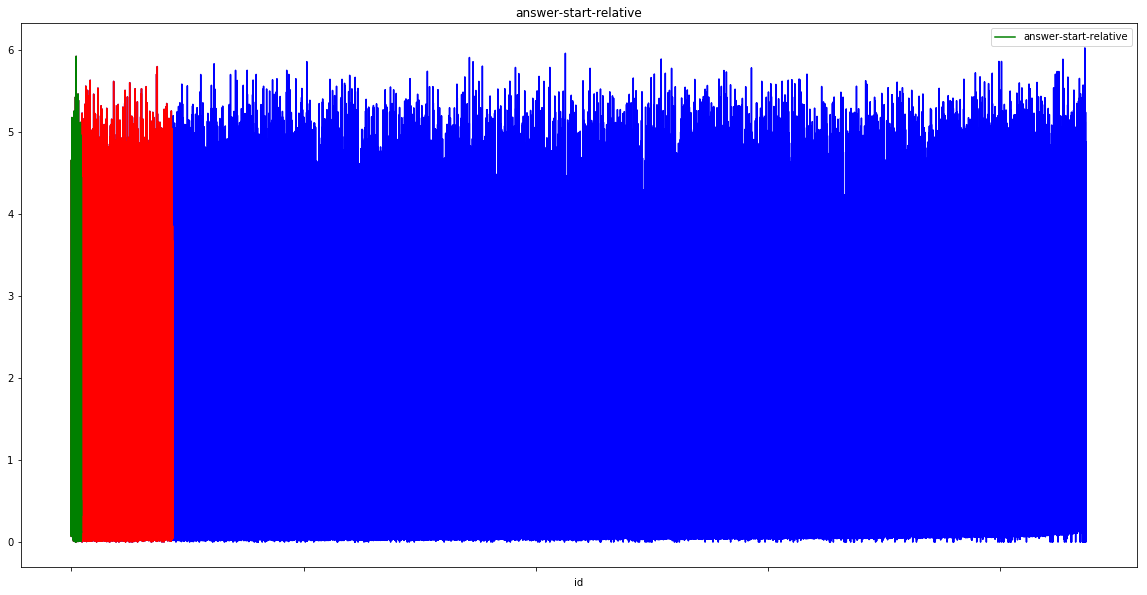

In [50]:
plot_single_feature(logits_d10_t10_i1)

In [41]:
def plot_features(sorted_file, plot=True):
    base_file = "data/newsqa_df.pkl"
    
    base_df = pd.read_pickle(base_file)
    sorted_df = pd.read_csv(sorted_file)
    sorted_df.columns = ['id','entropy']
    merged = pd.merge(sorted_df, base_df, on='id')
    window_length = 100
    # print(len(base_df), len(sorted_df), len(merged))
#     print(base_df.iloc[0:2].loc[:,'id'])
#     print(sorted_df.iloc[0:2].loc[:,'id'])
#     print(merged.iloc[0:2].loc[:,'id'])
#     sm = merged.sort_values('entropy', ascending=True)
    sm = merged.copy()
#     print(merged.iloc[0:2].loc[:,'id'])
    sm['new-context-length'] = sm['context-length'].rolling(window_length).mean()
    sm['new-answer-start'] = sm['answer-start'].rolling(window_length).mean()
    sm['new-num-context-ner-features'] = sm['num-context-ner-features'].rolling(window_length).mean()
    sm['new-num-context-date-features'] = sm['num-context-date-features'].rolling(window_length).mean()
    sm['new-answer-length'] = sm['answer-length'].rolling(window_length).mean()
    print(sm.columns)
    if plot == True:
        cols_1 = ['new-context-length']
        plot_cols(sm, cols_1,title='new-context-length')
        
        cols_1 = ['new-num-context-ner-features']
        plot_cols(sm, cols_1,title='new-num-context-ner-features')

        cols_2 = ['new-num-context-date-features']
        plot_cols(sm, cols_2,title='new-num-context-date-features')

        cols_4 = ['new-answer-length']
        plot_cols(sm, cols_4,title='new-answer-length')

        cols_5 = ['new-answer-start']
        plot_cols(sm, cols_5,title='new-answer-start')

In [23]:
base_file = "data/squad_df.pkl"

squad_df = pd.read_pickle(base_file)

In [24]:
squad_df.columns

Index(['context-length', 'num-context-ner-features', 'context-ner-features',
       'num-context-date-features', 'context-date-features', 'q-word',
       'q-word-pos', 'prev-q-word', 'prev-q-word-pos', 'next-q-word',
       'next-q-word-pos', 'is-q-word-begin', 'num-q-ner-features',
       'q-ner-features', 'answer-length', 'answer-start',
       'num-answer-ner-features', 'answer-ner-features',
       'num-answer-date-features', 'answer-date-features'],
      dtype='object')

In [25]:
squad_df['answer-start'].mean()

319.87622004817405

In [26]:
base_file = "data/newsqa_df.pkl"

newsqa_df = pd.read_pickle(base_file)
newsqa_df['answer-start'].mean()

932.9876893884372

In [27]:
logits_1_i1 = "data/logits/logits-1-i1.csv"
logits_10_i1 = "data/logits/logits-10-i1.csv"
logits_d1_t1_i1 = "data/logits/logits-dump1-top1-i1.csv"
logits_d10_t1_i1 = "data/logits/logits-dump10-top1-i1.csv"
logits_d10_t10_i1 = "data/logits/logits-dump10-top10-i1.csv"
logits_c_1_i1 = "data/logits/certain-logits-1-i1.csv"
# logits_c_10_i1 = "data/logits/certain-logits-10-i1.csv"
logits_c_d1_t1_i1 = "data/logits/certain-logits-dump1-top1-i1.csv"
logits_c_d1_t10_i1 = "data/logits/certain-logits-dump1-top10-i1.csv"
logits_c_d10_t1_i1 = "data/logits/certain-logits-dump10-top1-i1.csv"
logits_c_d10_t10_i1 = "data/logits/certain-logits-dump10-top10-i1.csv"

logits_10_i2 = "data/logits2/logits-10-i2.csv"
logits_d1_t1_i2 = "data/logits2/logits-dump1-top1-i2.csv"

Index(['id', 'entropy', 'context-length', 'num-context-ner-features',
       'context-ner-features', 'num-context-date-features',
       'context-date-features', 'q-word', 'q-word-pos', 'prev-q-word',
       'prev-q-word-pos', 'next-q-word', 'next-q-word-pos', 'is-q-word-begin',
       'num-q-ner-features', 'q-ner-features', 'answer-length', 'answer-start',
       'num-answer-ner-features', 'answer-ner-features',
       'num-answer-date-features', 'answer-date-features',
       'new-context-length', 'new-answer-start',
       'new-num-context-ner-features', 'new-num-context-date-features',
       'new-answer-length'],
      dtype='object')


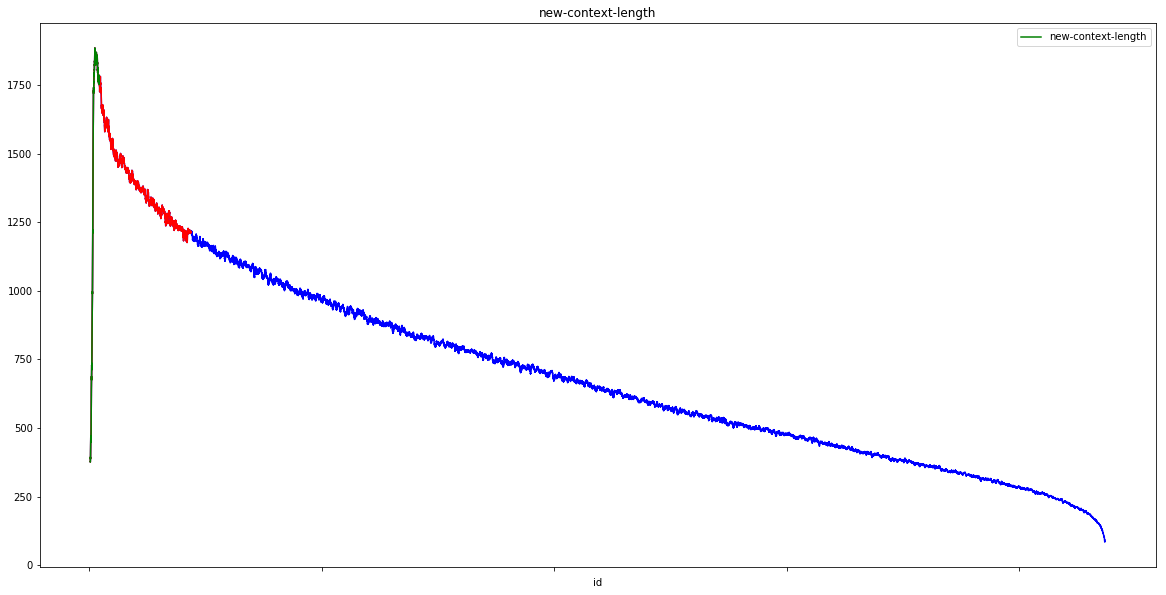

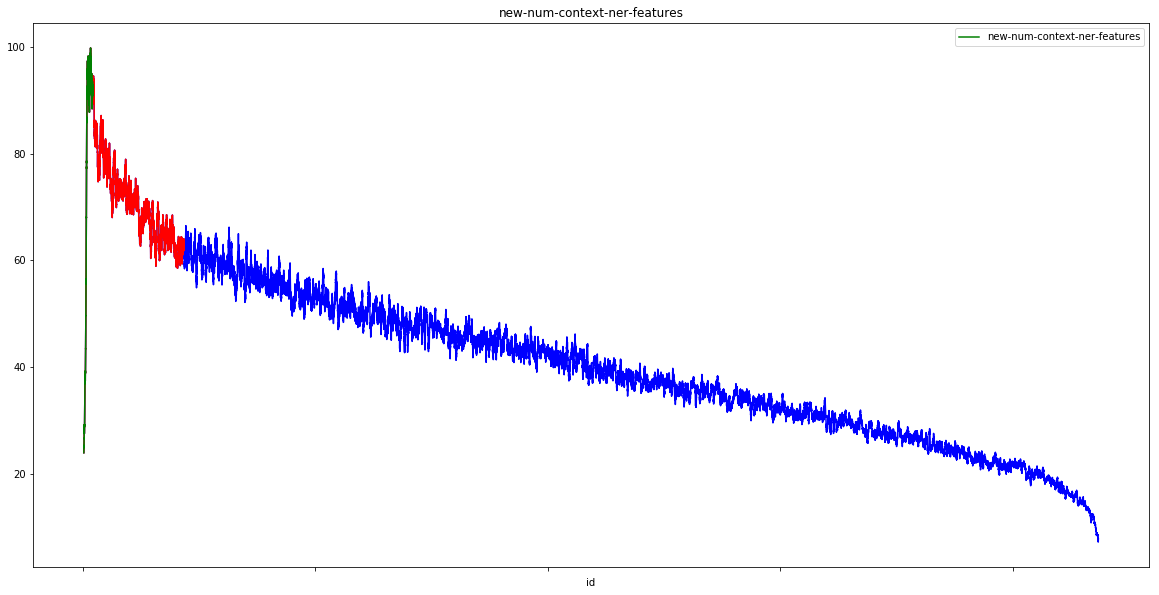

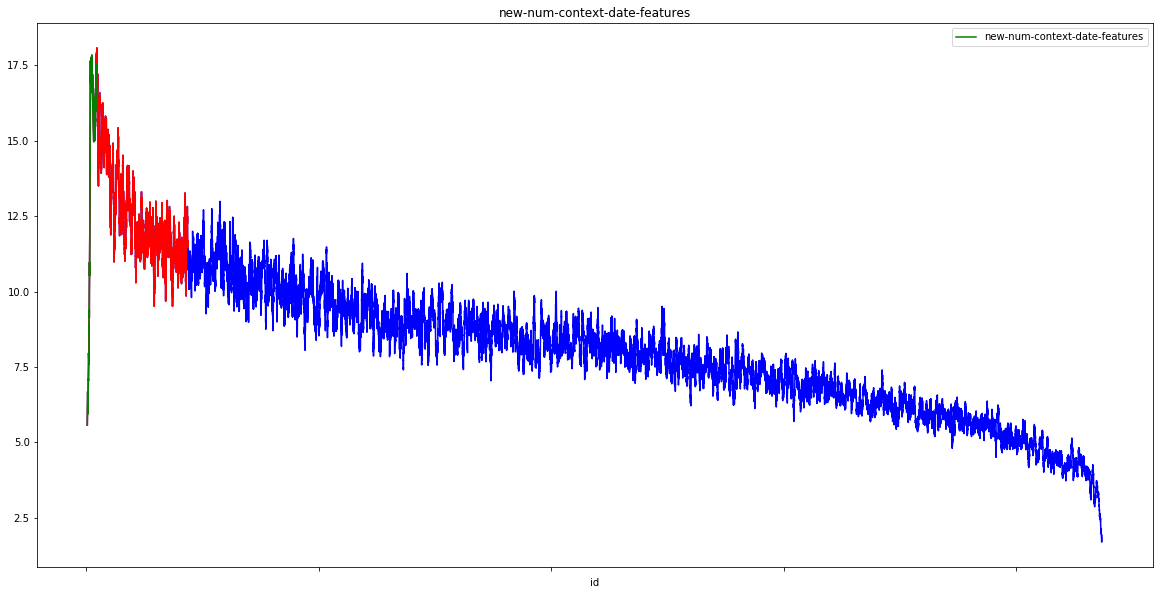

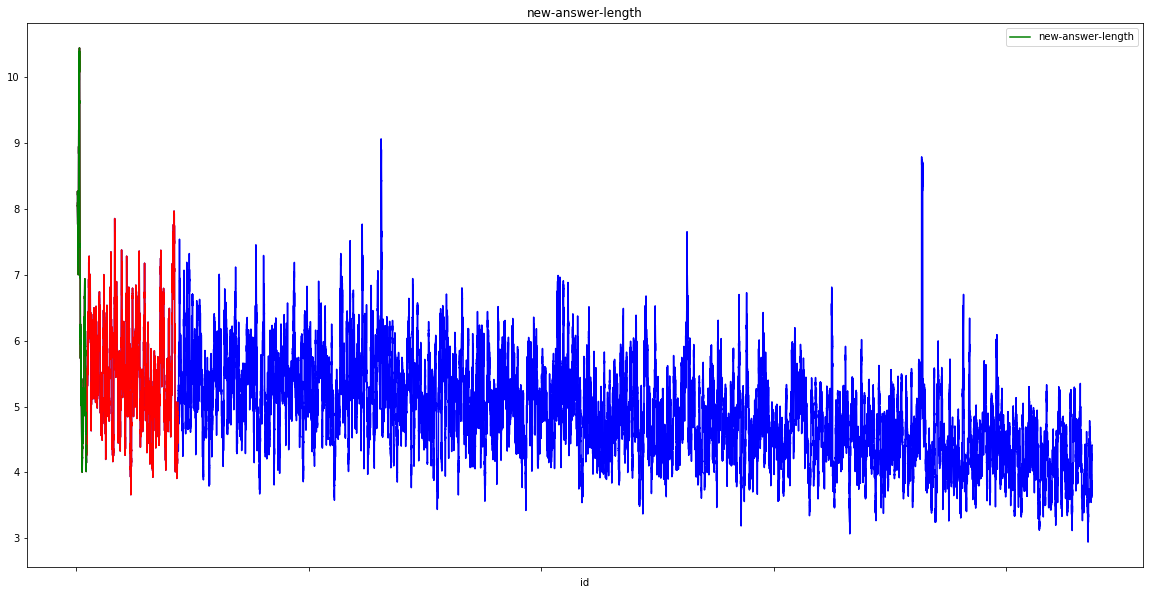

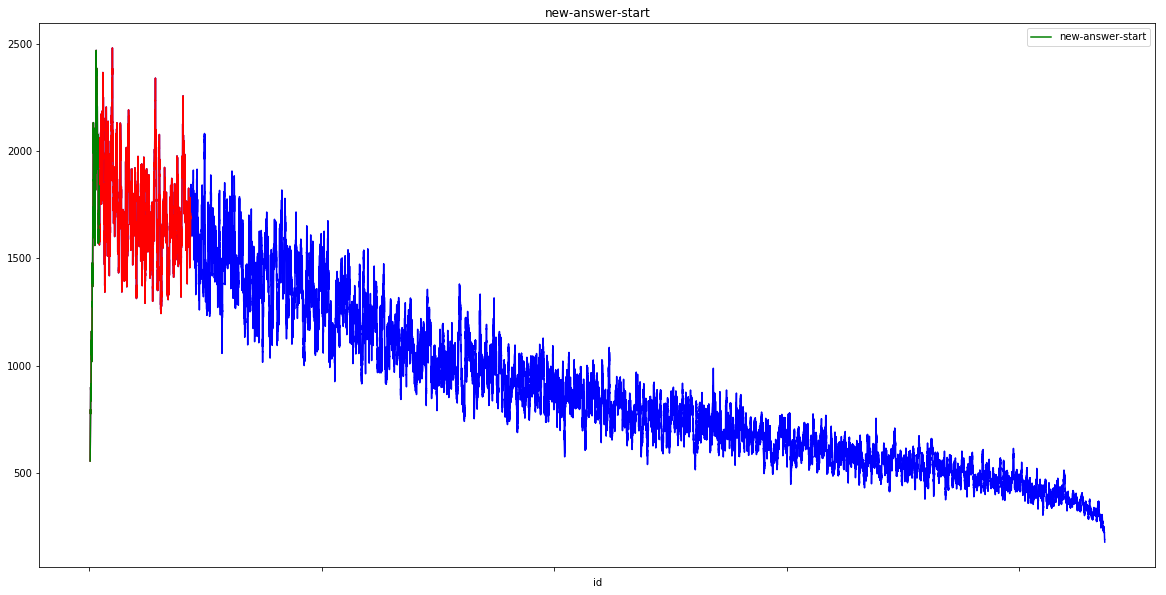

In [42]:
plot_features(logits_d10_t10_i1)

# Logits 

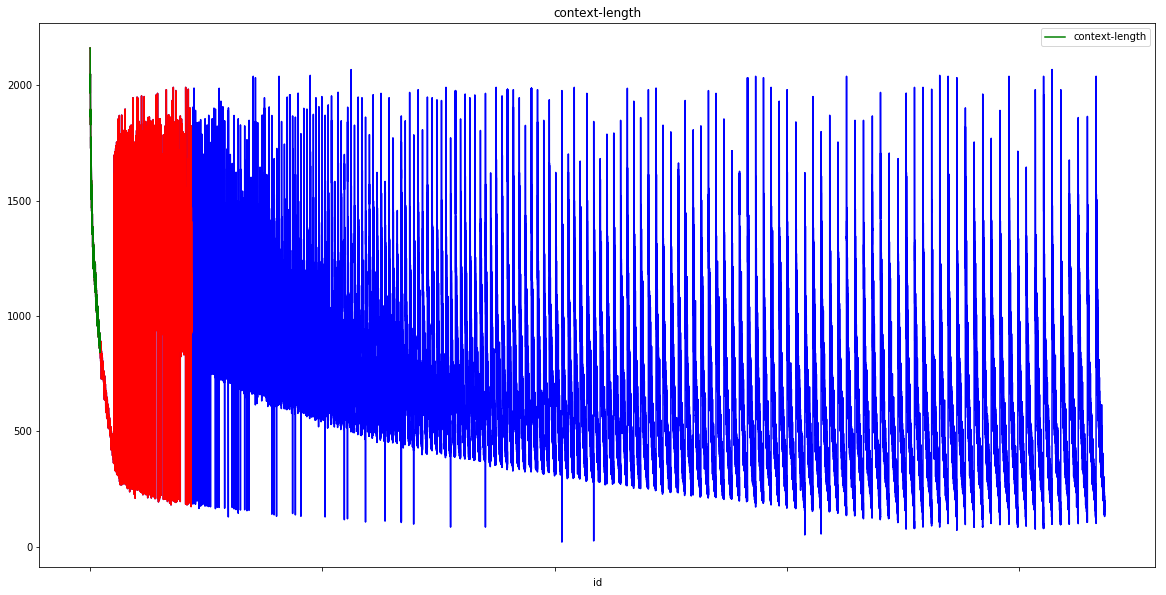

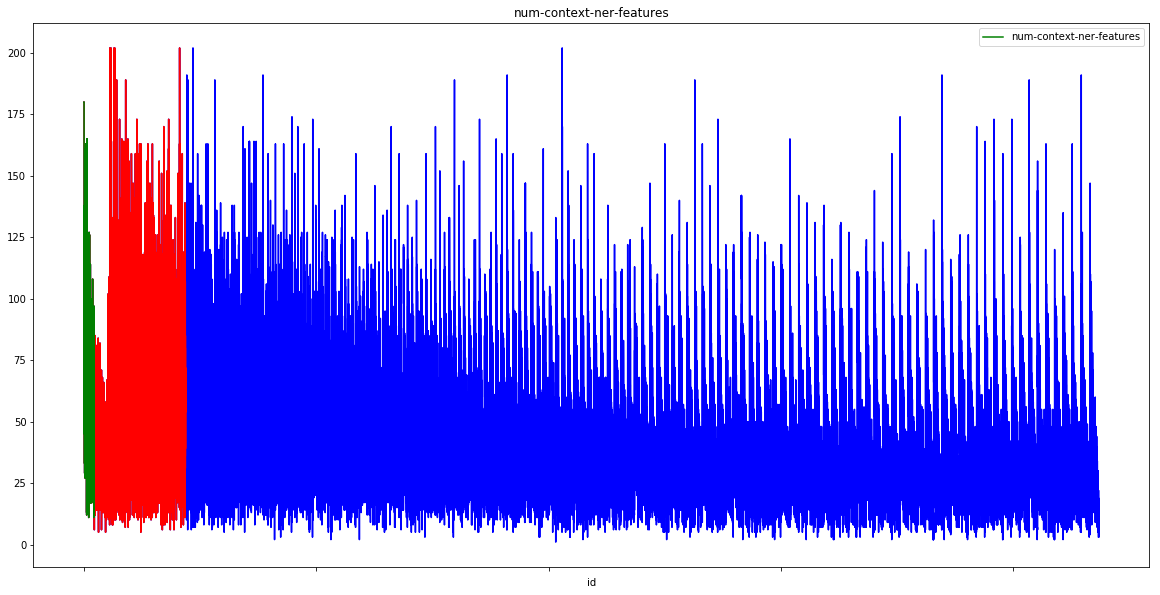

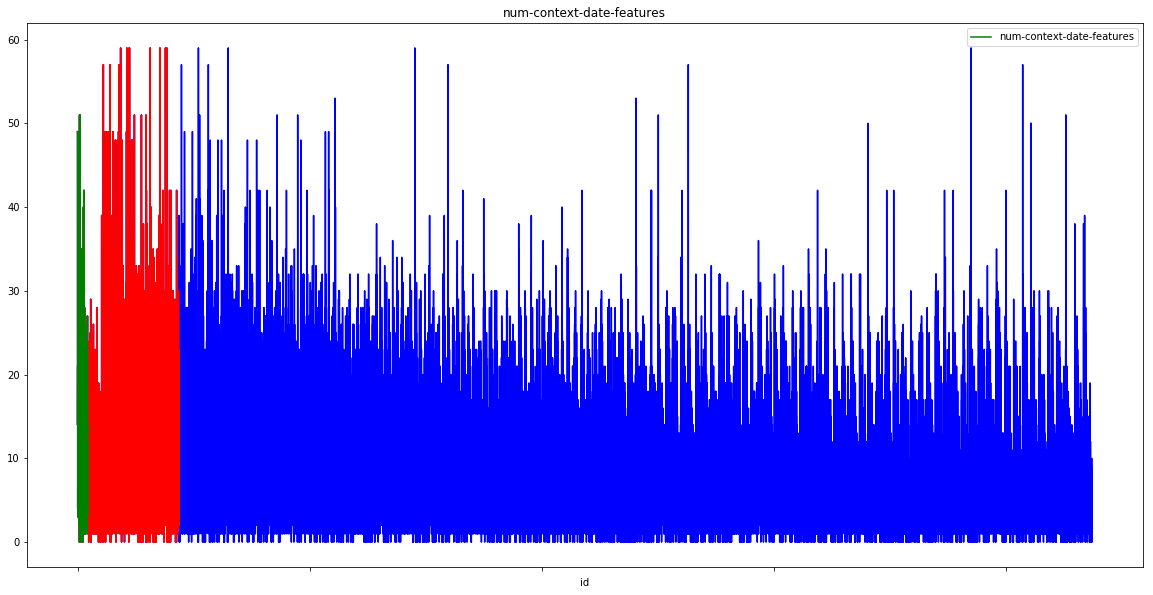

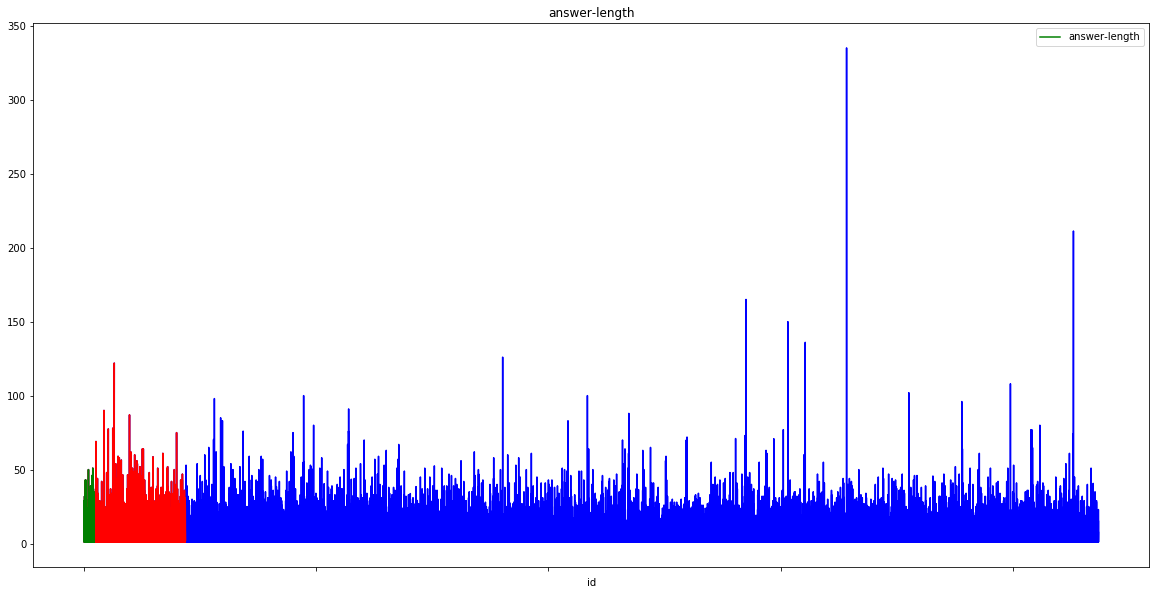

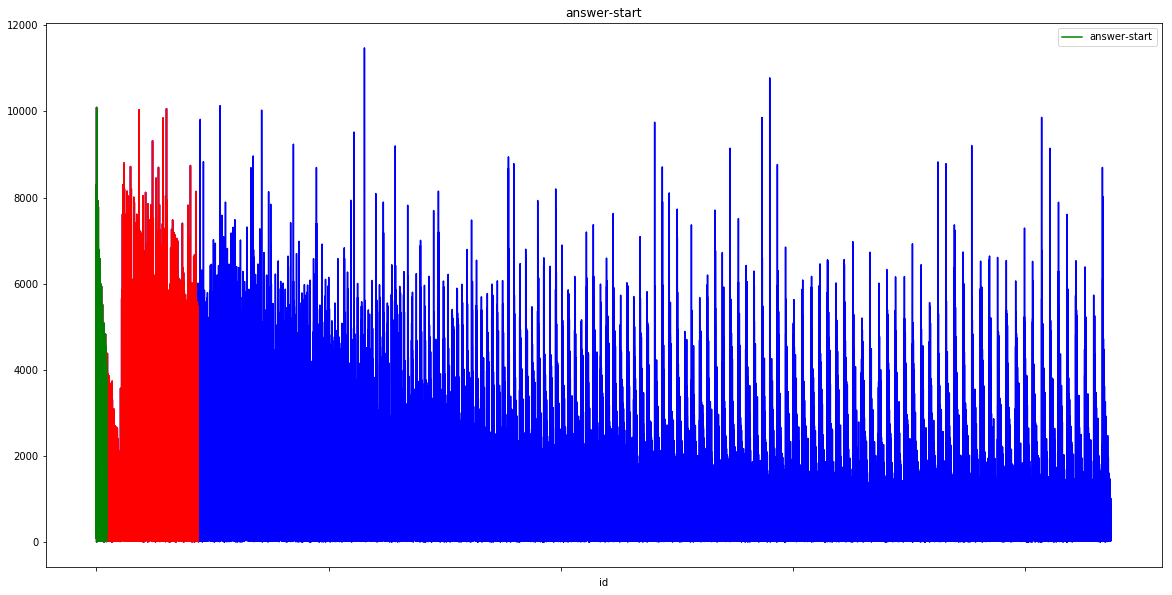

In [9]:
plot_features(logits_1_i1)

# Logits top 1%

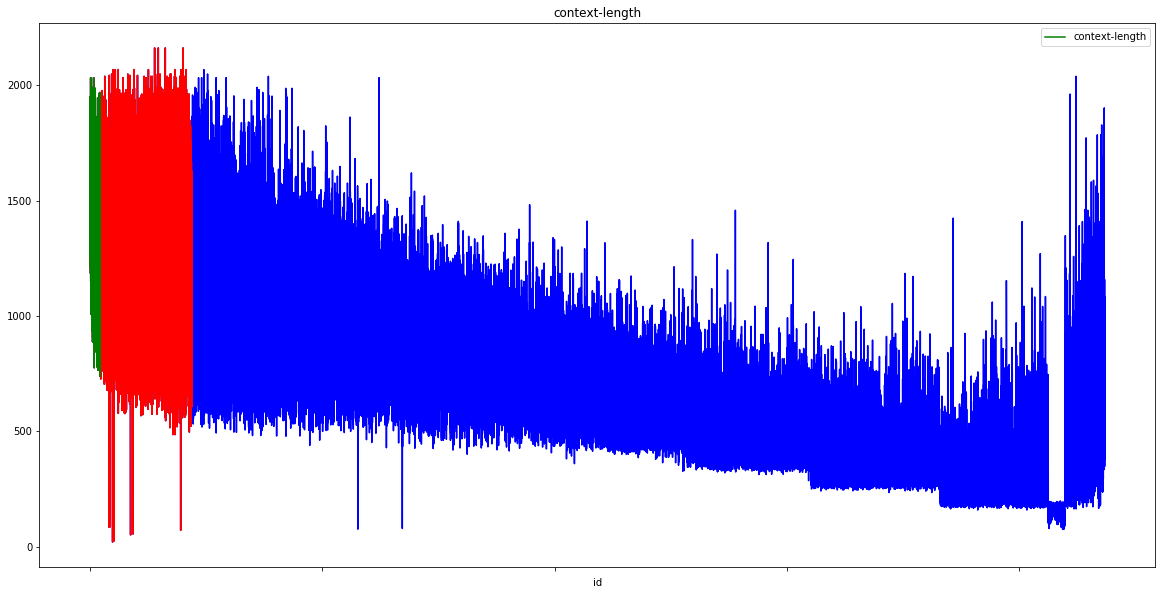

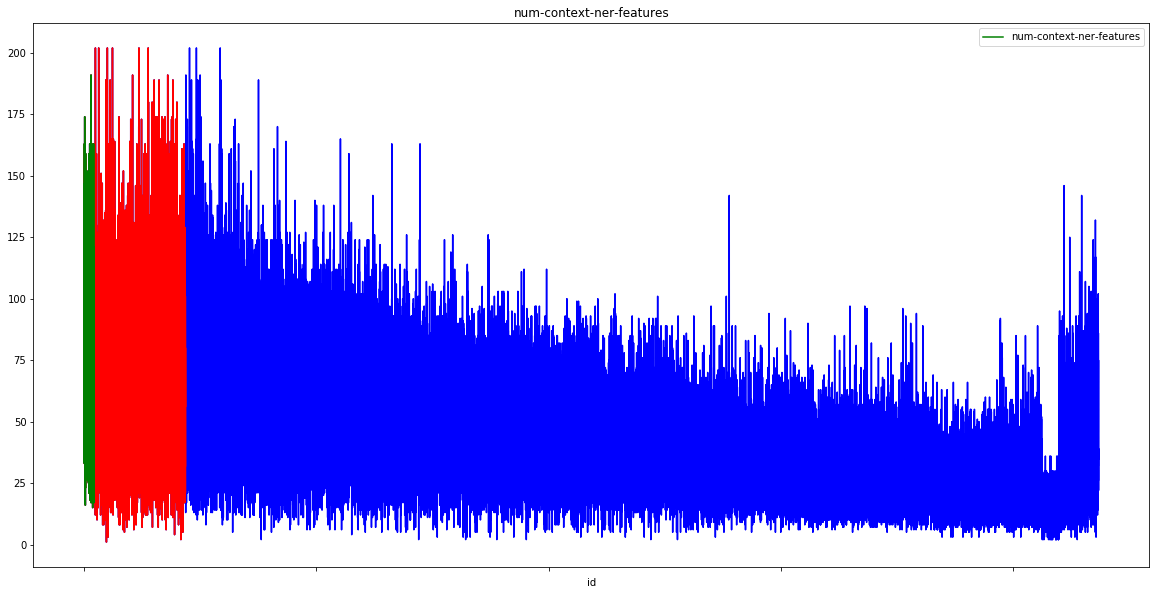

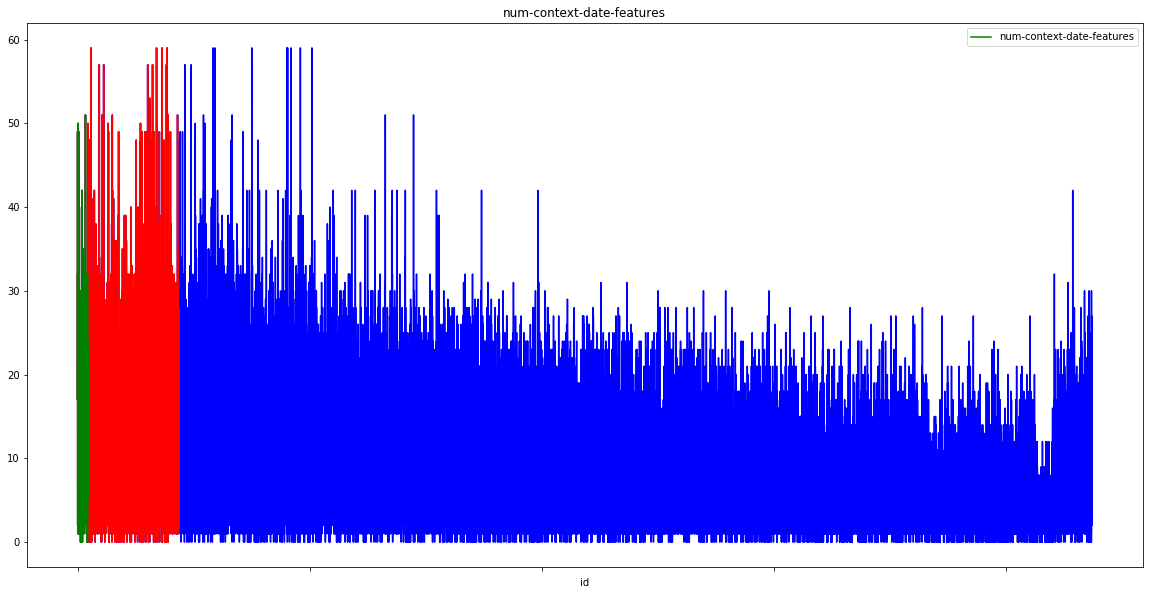

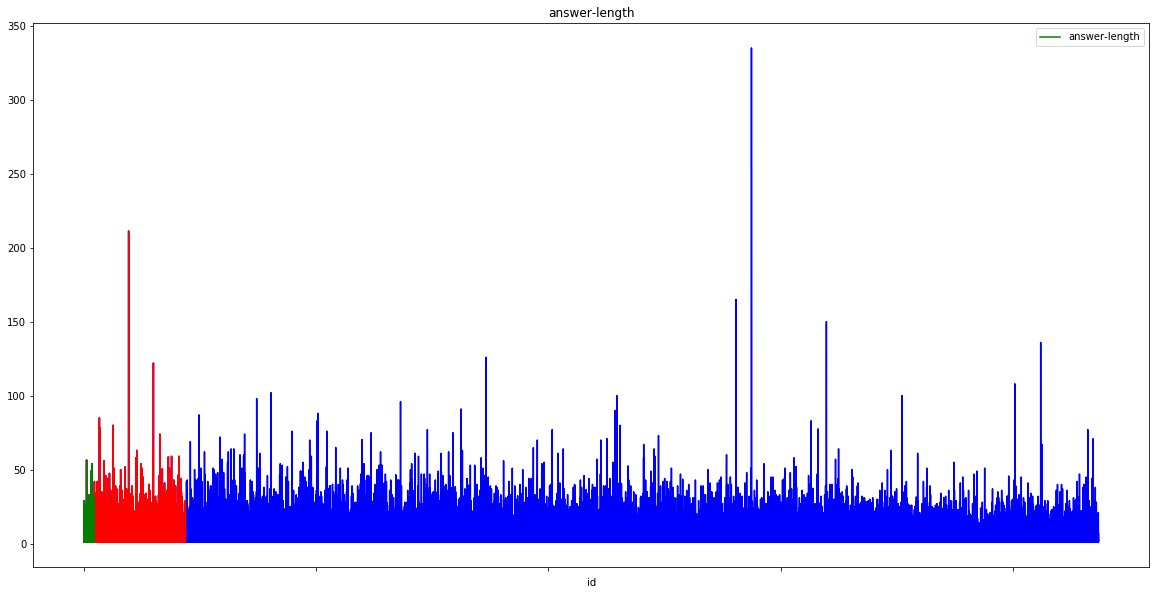

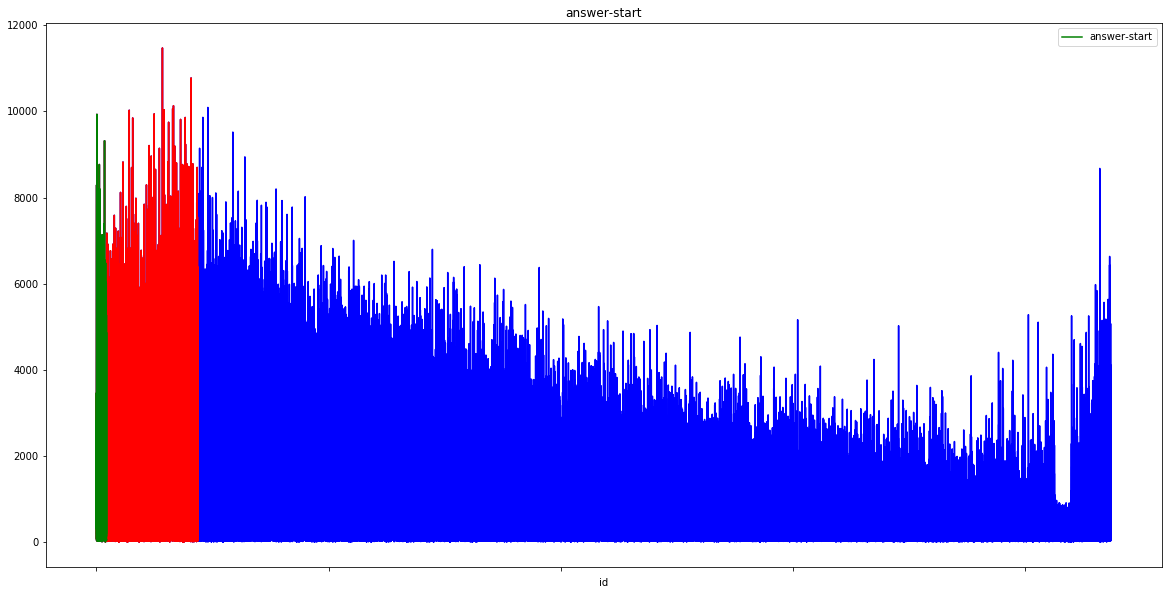

In [10]:
plot_features(logits_d1_t1_i1)

# Logits top 10%

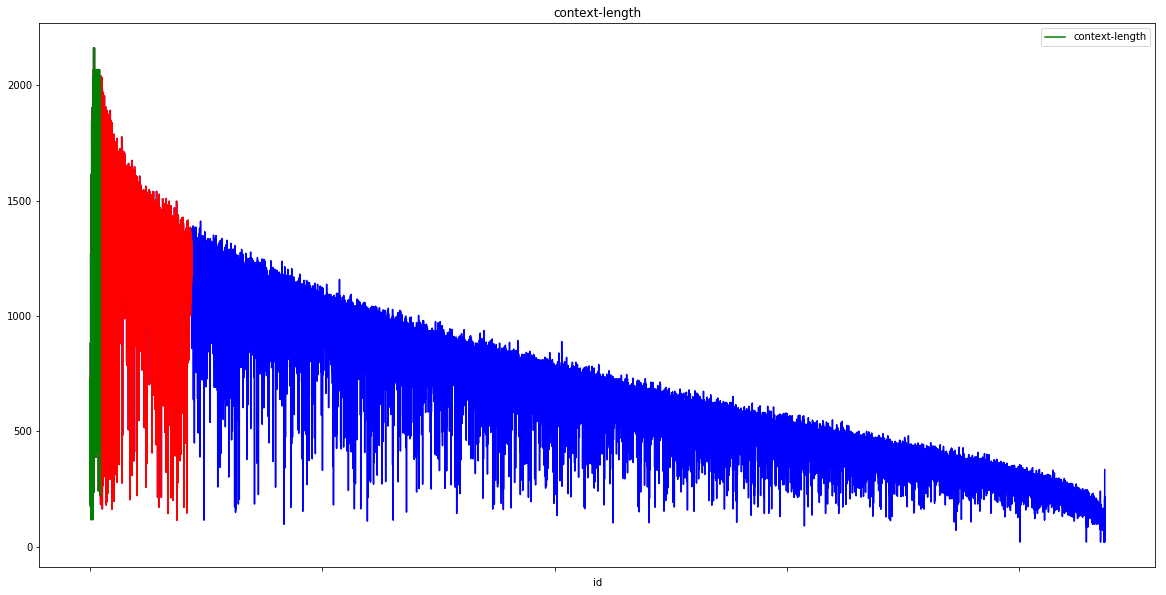

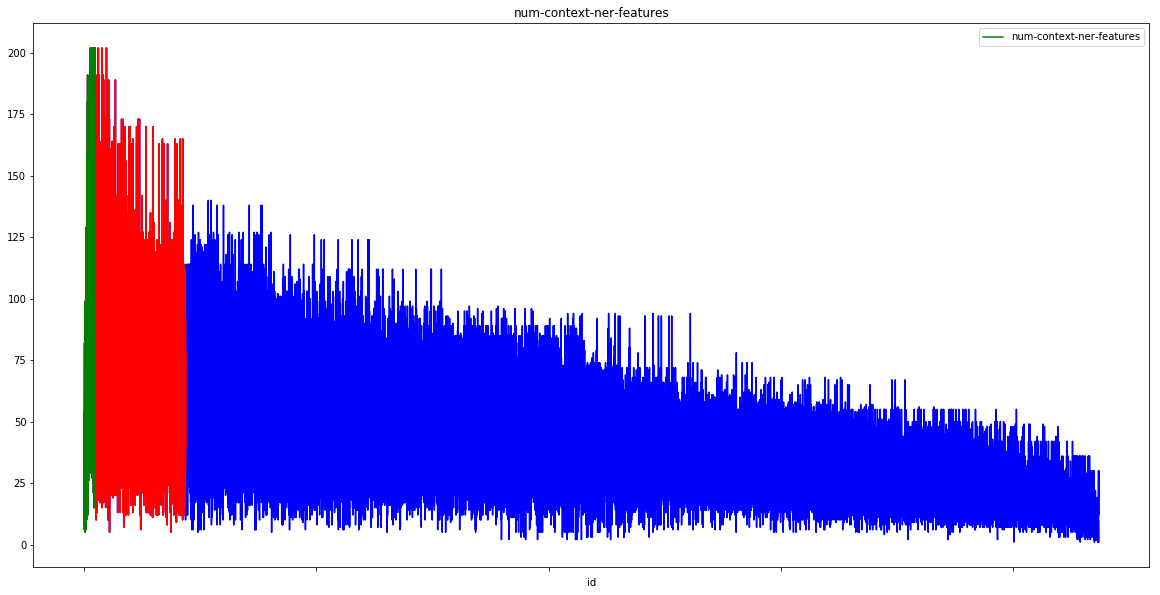

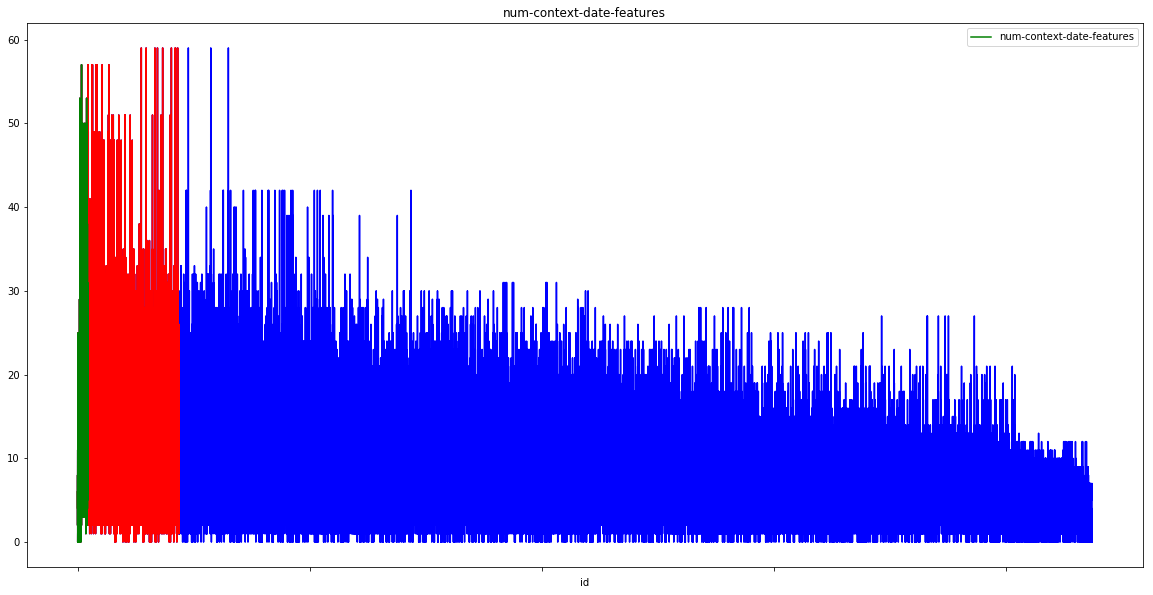

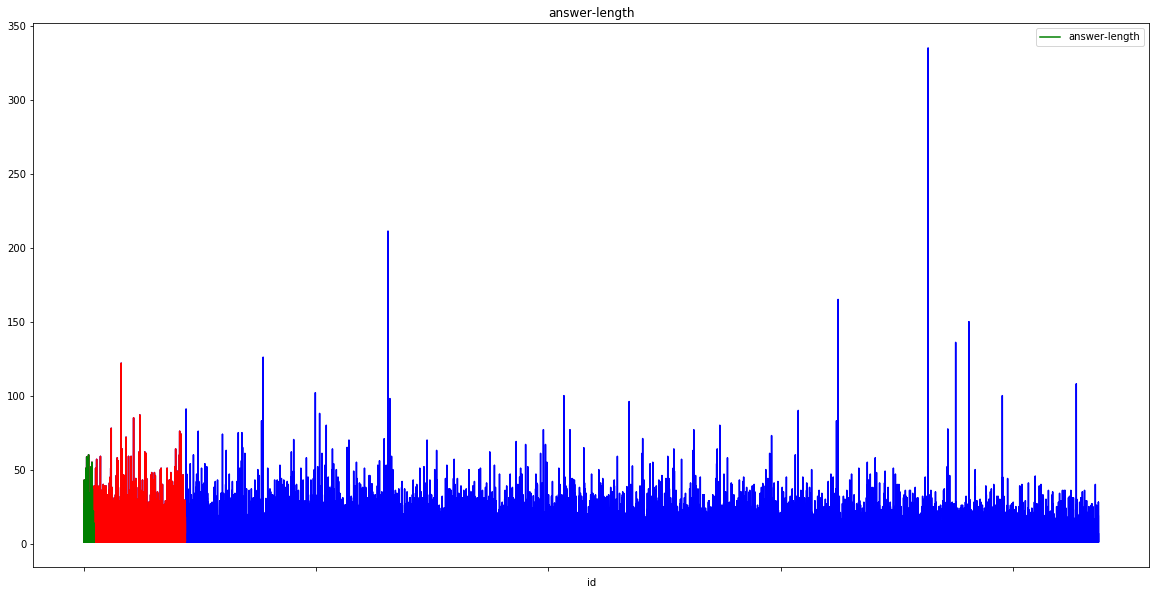

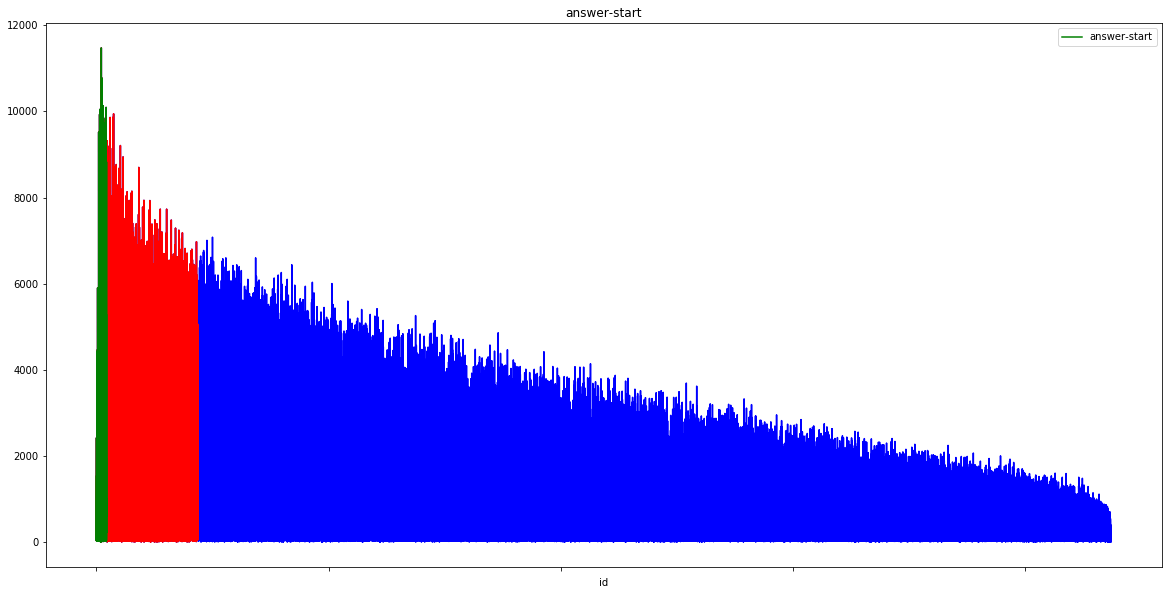

In [11]:
plot_features(logits_d10_t10_i1)

1    42d01e187213e86f5fe617fe32e716ff7fa3afc40
2    42d01e187213e86f5fe617fe32e716ff7fa3afc41
Name: id, dtype: object
0    e26d9215e36caeee46bb871e6c47b01aae78e2a50
1    e26d9215e36caeee46bb871e6c47b01aae78e2a53
Name: id, dtype: object
0    e26d9215e36caeee46bb871e6c47b01aae78e2a50
1    e26d9215e36caeee46bb871e6c47b01aae78e2a53
Name: id, dtype: object
0    e26d9215e36caeee46bb871e6c47b01aae78e2a50
1    e26d9215e36caeee46bb871e6c47b01aae78e2a53
Name: id, dtype: object


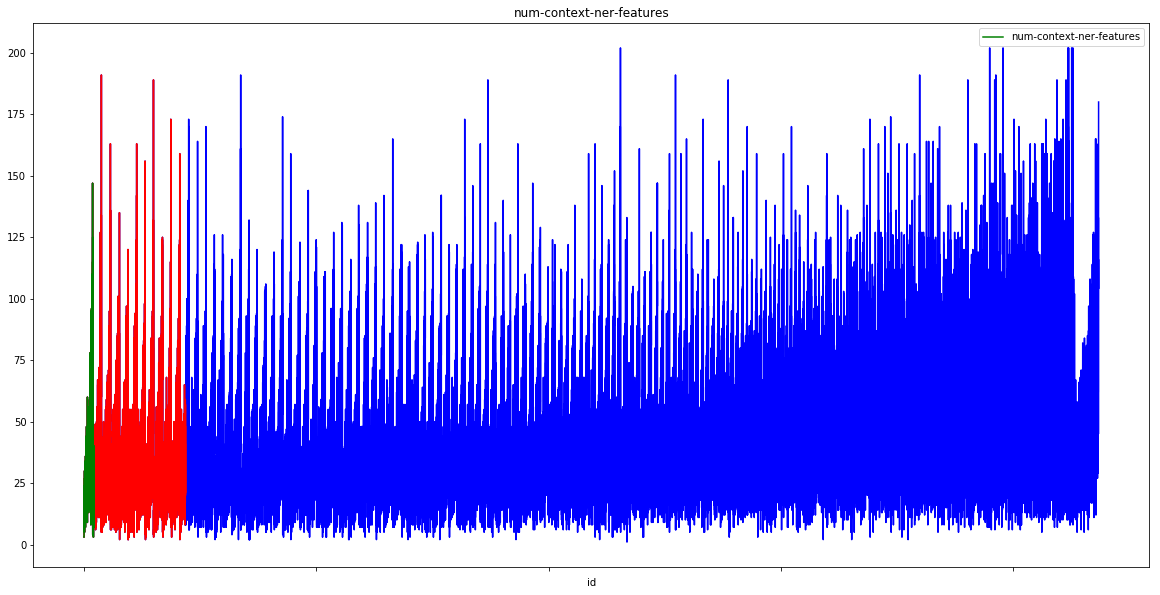

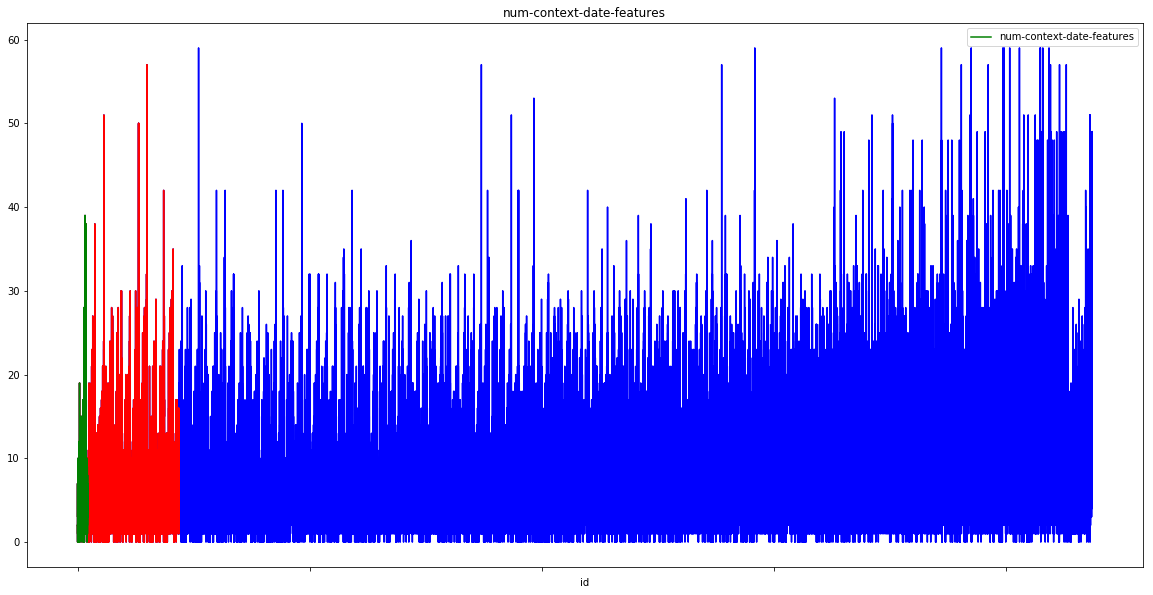

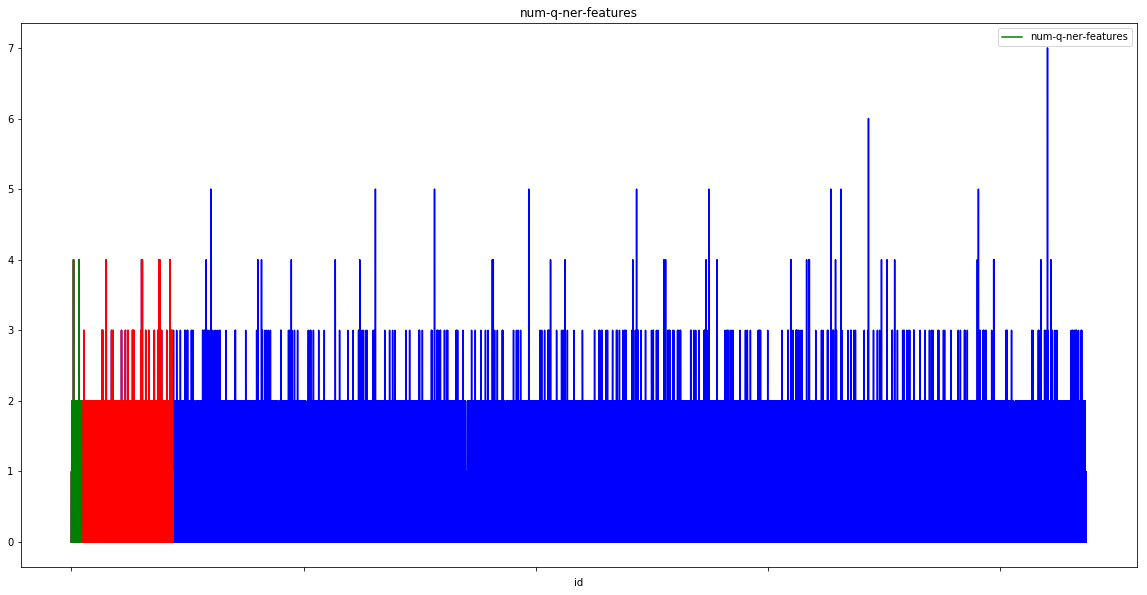

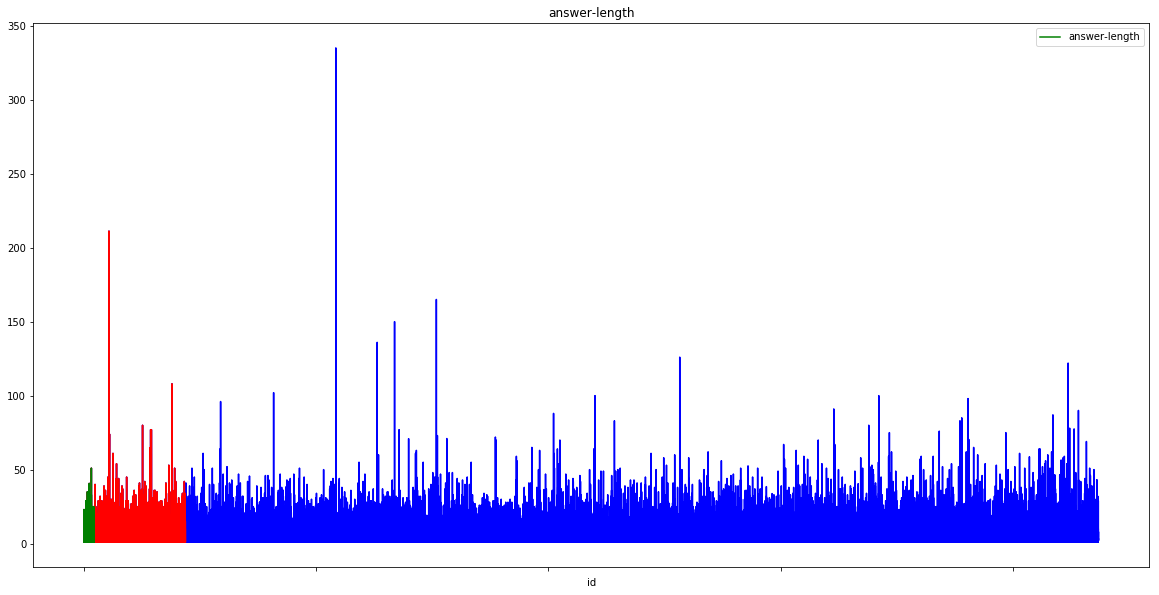

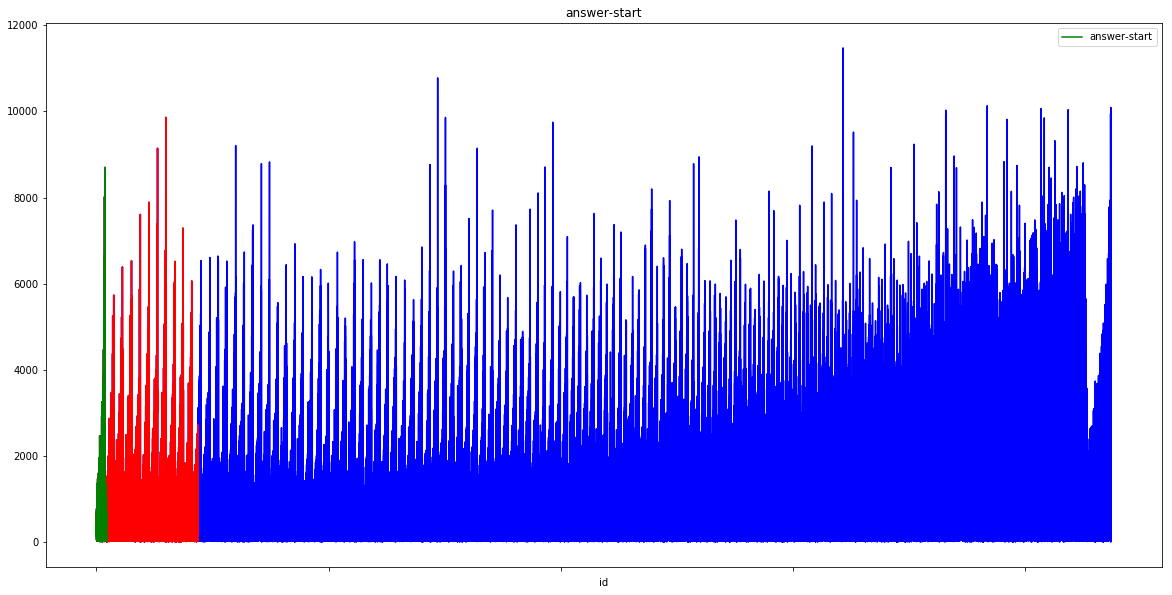

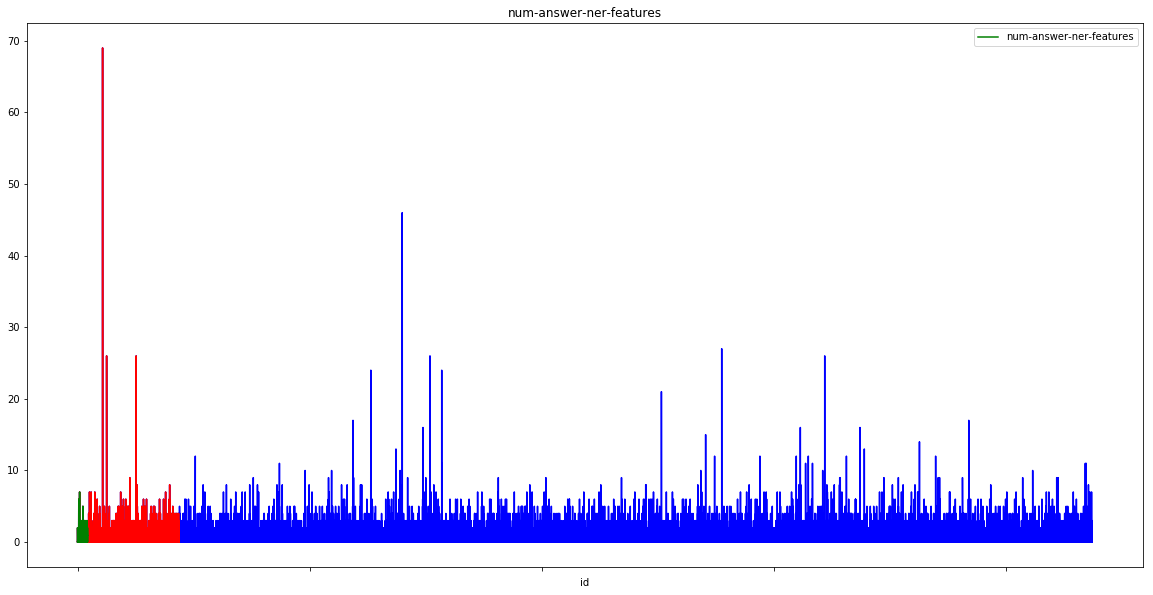

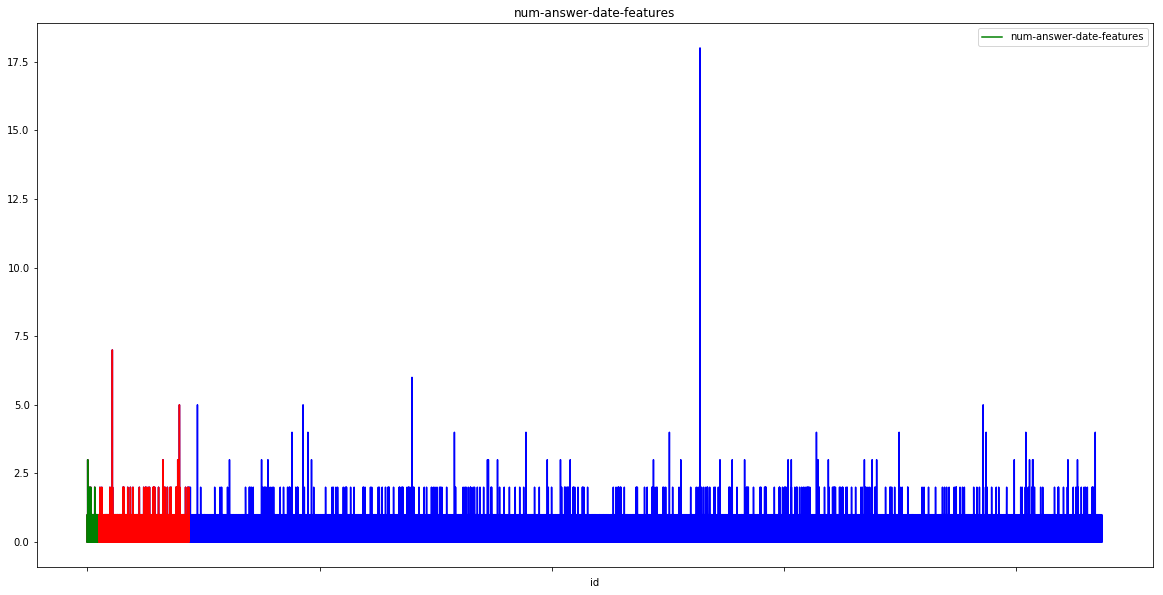

In [235]:
plot_features(logits_c_1_i1)

1    42d01e187213e86f5fe617fe32e716ff7fa3afc40
2    42d01e187213e86f5fe617fe32e716ff7fa3afc41
Name: id, dtype: object
0    629c06761462f9891ea74c5346b27c8fb19200776
1    503a6fca6b41198bdd1b09ab0ba63b660e77a8128
Name: id, dtype: object
0    629c06761462f9891ea74c5346b27c8fb19200776
1    503a6fca6b41198bdd1b09ab0ba63b660e77a8128
Name: id, dtype: object
0    629c06761462f9891ea74c5346b27c8fb19200776
1    503a6fca6b41198bdd1b09ab0ba63b660e77a8128
Name: id, dtype: object


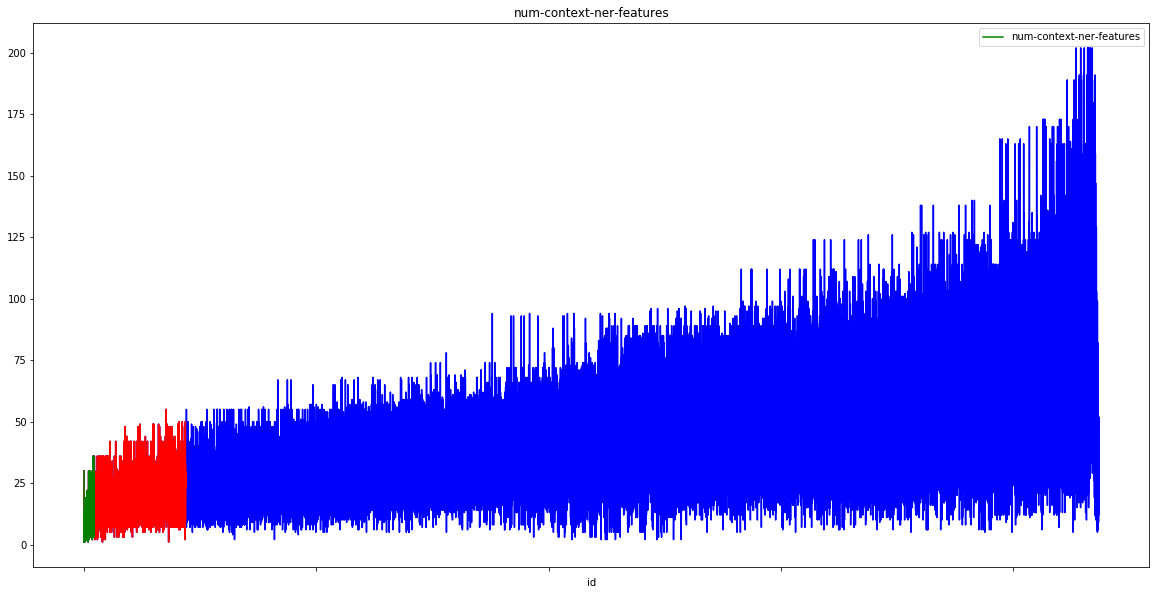

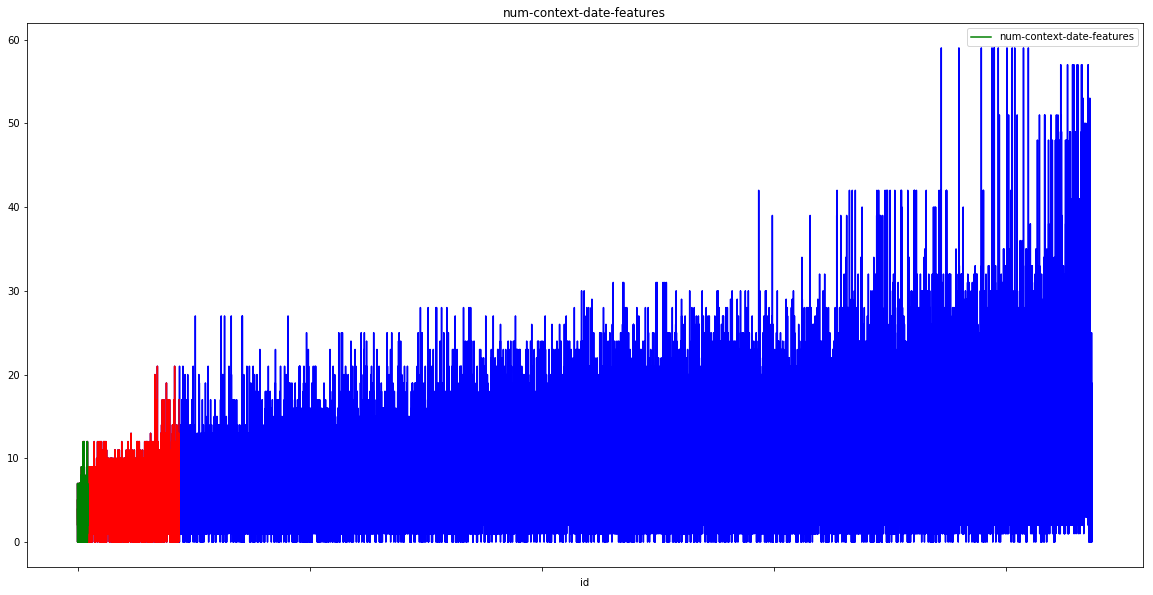

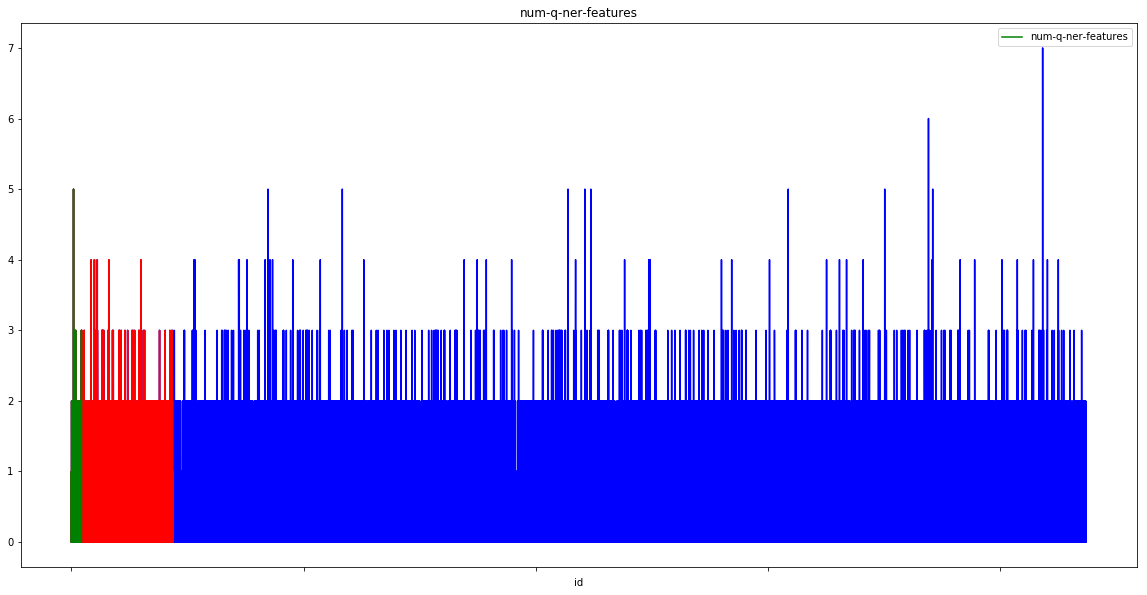

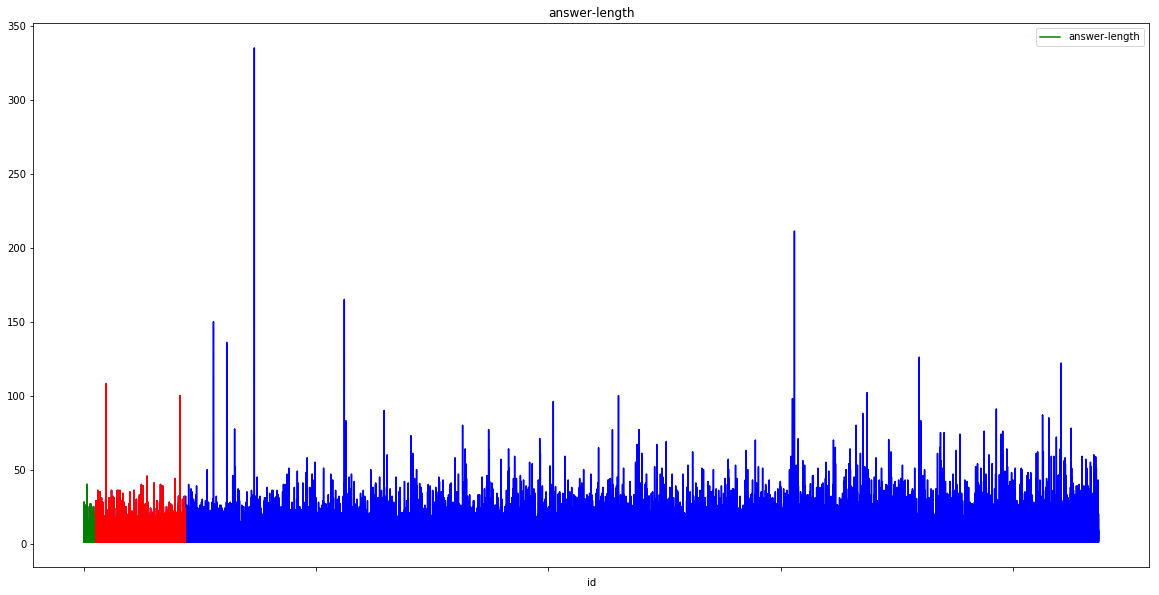

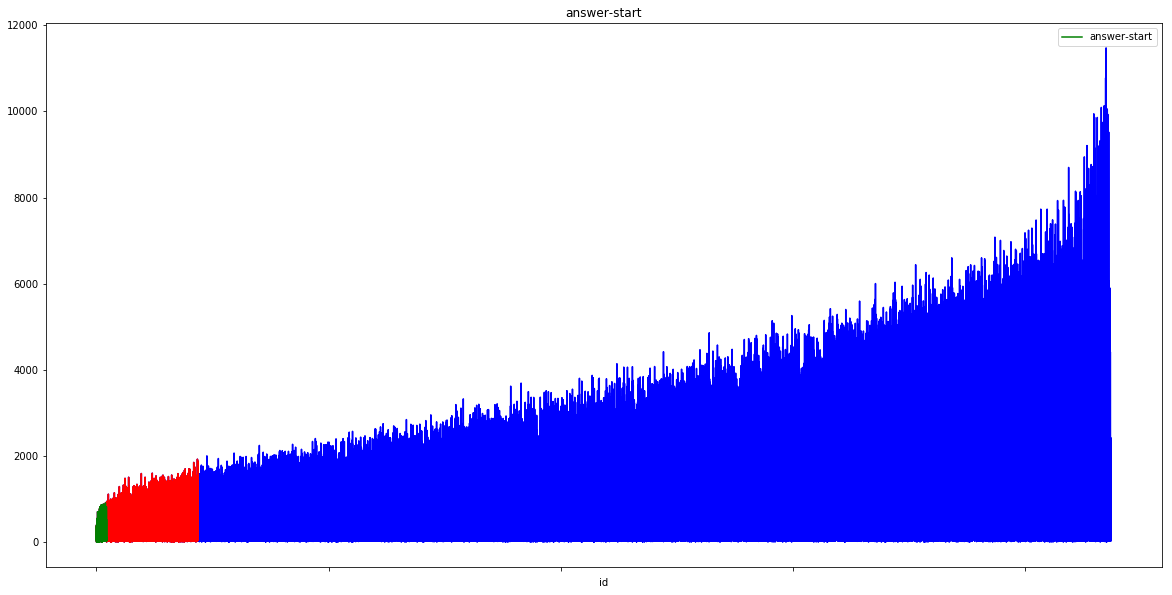

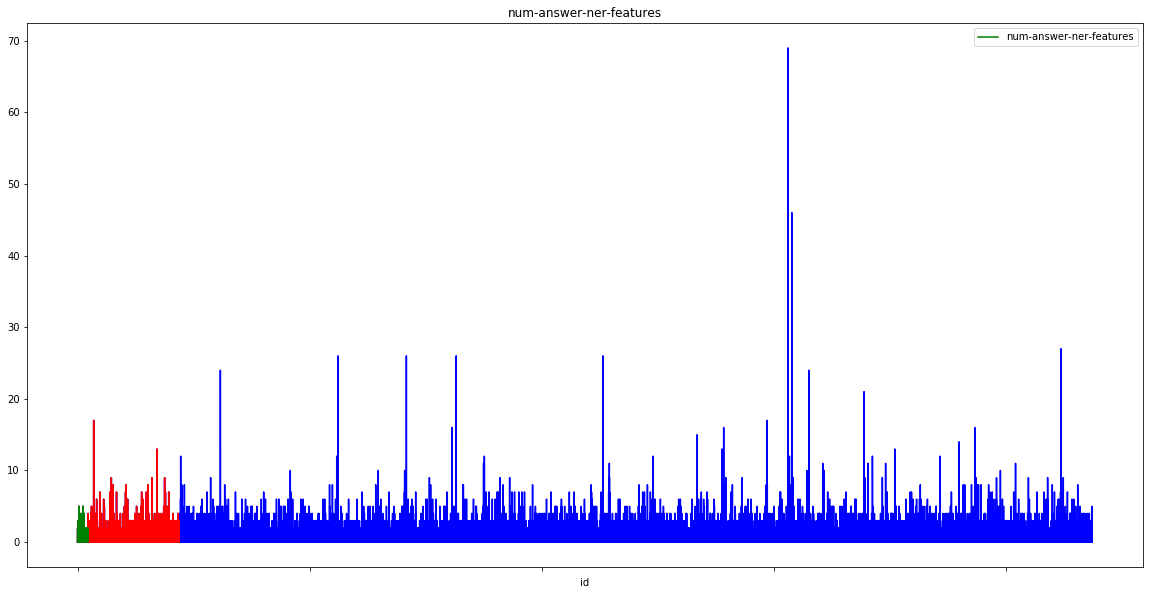

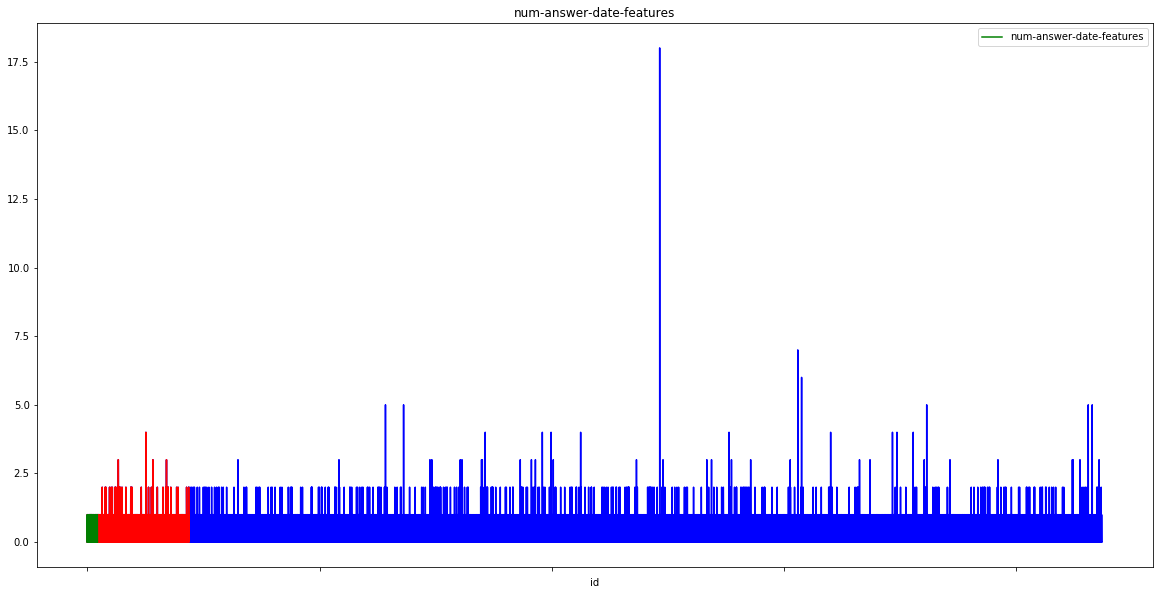

In [236]:
plot_features(logits_c_d10_t10_i1)

1    42d01e187213e86f5fe617fe32e716ff7fa3afc40
2    42d01e187213e86f5fe617fe32e716ff7fa3afc41
Name: id, dtype: object
0    01fec10f5d7e013d0807b94ab8e4a232d74a00d51
1    814ebf3b8bc583b672d0488c150bcfe87ca8c4223
Name: id, dtype: object
0    01fec10f5d7e013d0807b94ab8e4a232d74a00d51
1    814ebf3b8bc583b672d0488c150bcfe87ca8c4223
Name: id, dtype: object
0    01fec10f5d7e013d0807b94ab8e4a232d74a00d51
1    814ebf3b8bc583b672d0488c150bcfe87ca8c4223
Name: id, dtype: object


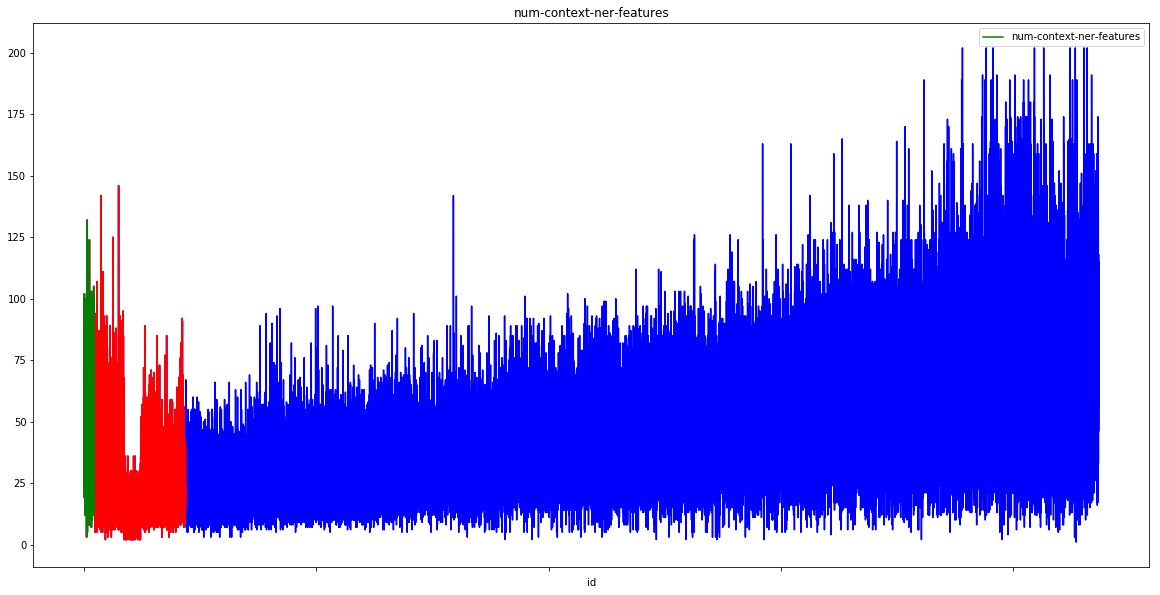

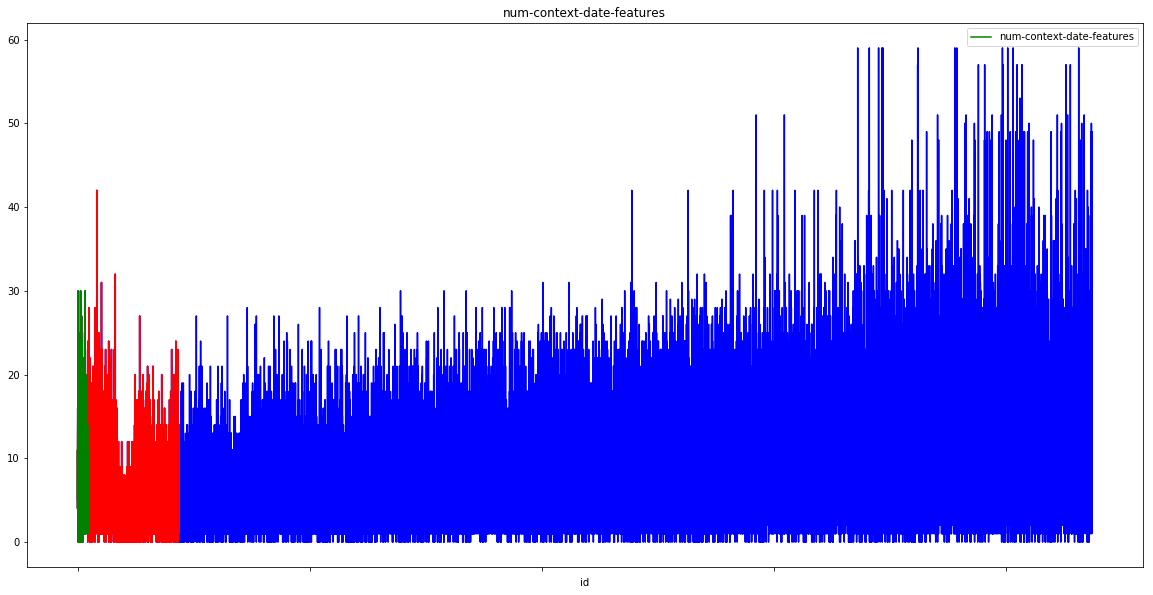

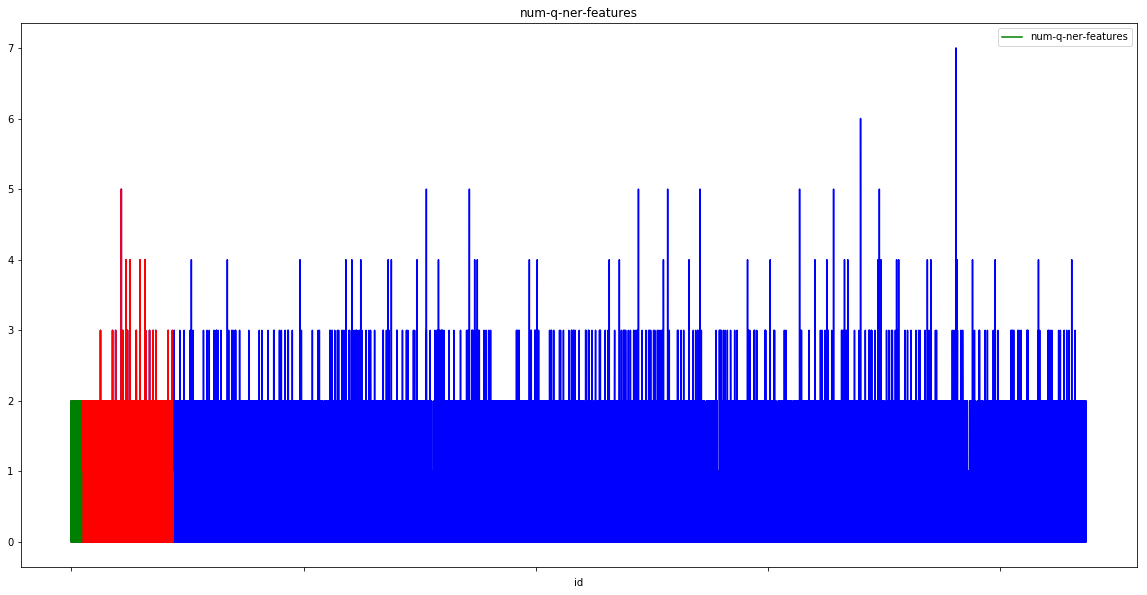

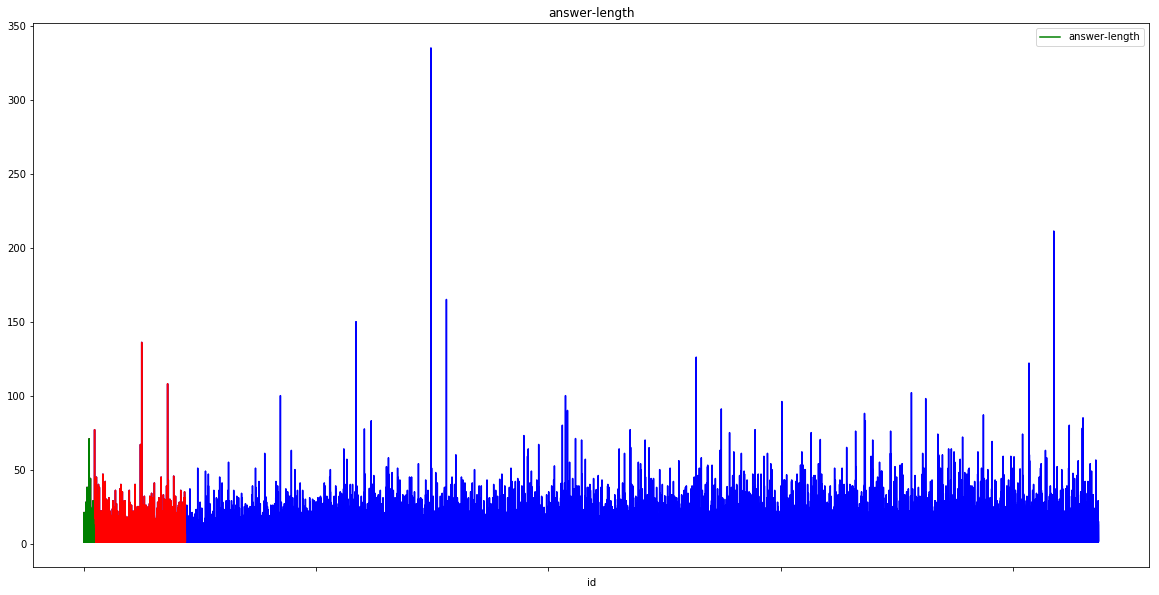

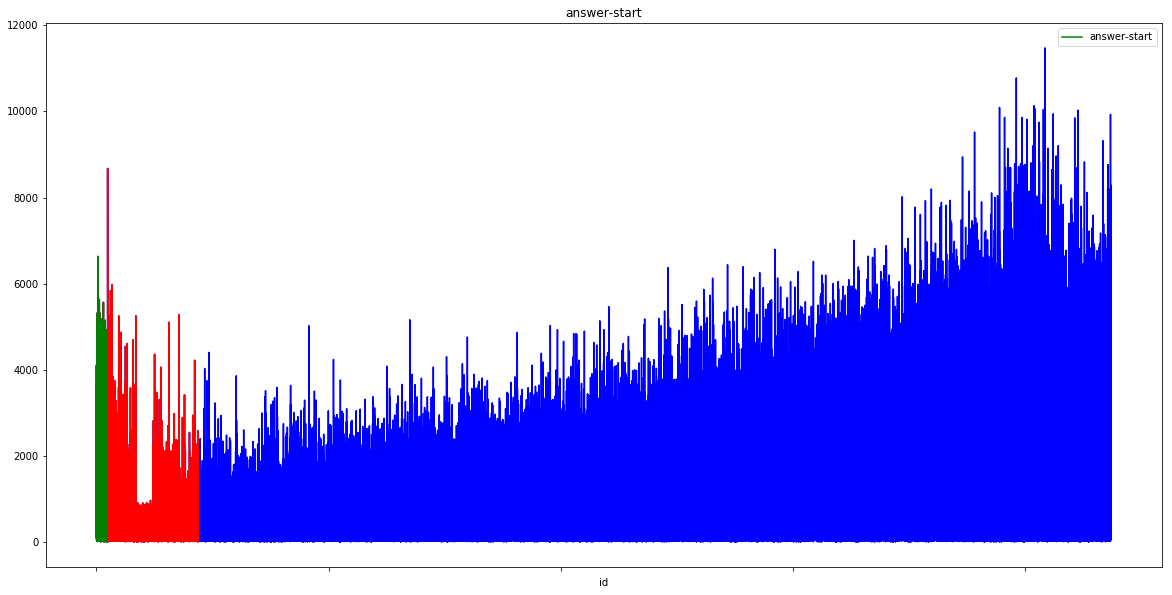

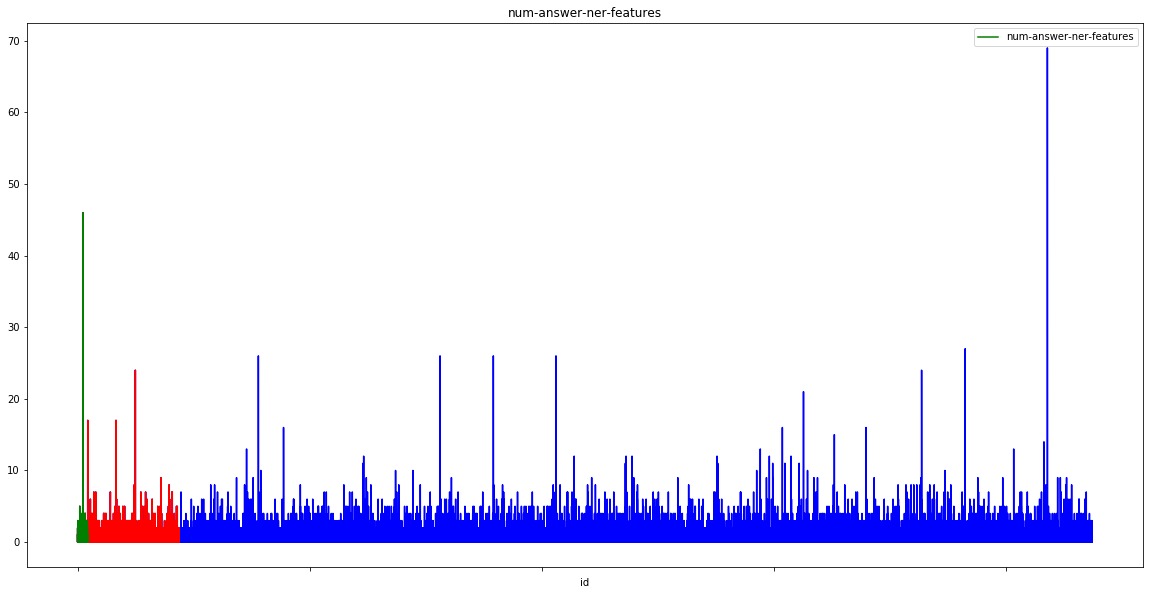

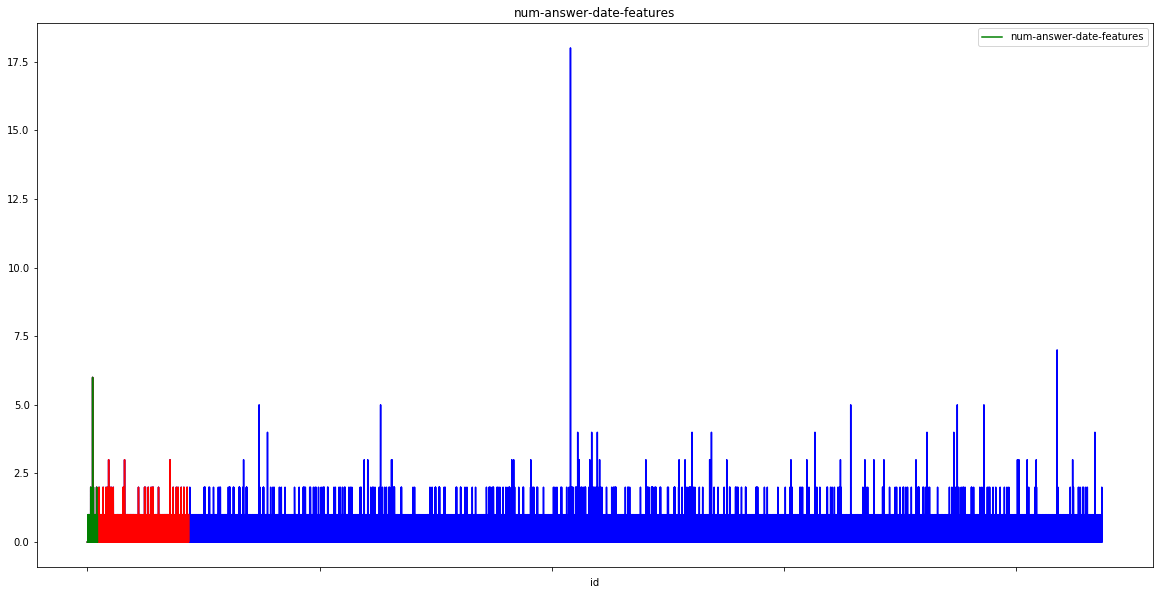

In [238]:
plot_features(logits_c_d10_t1_i1)

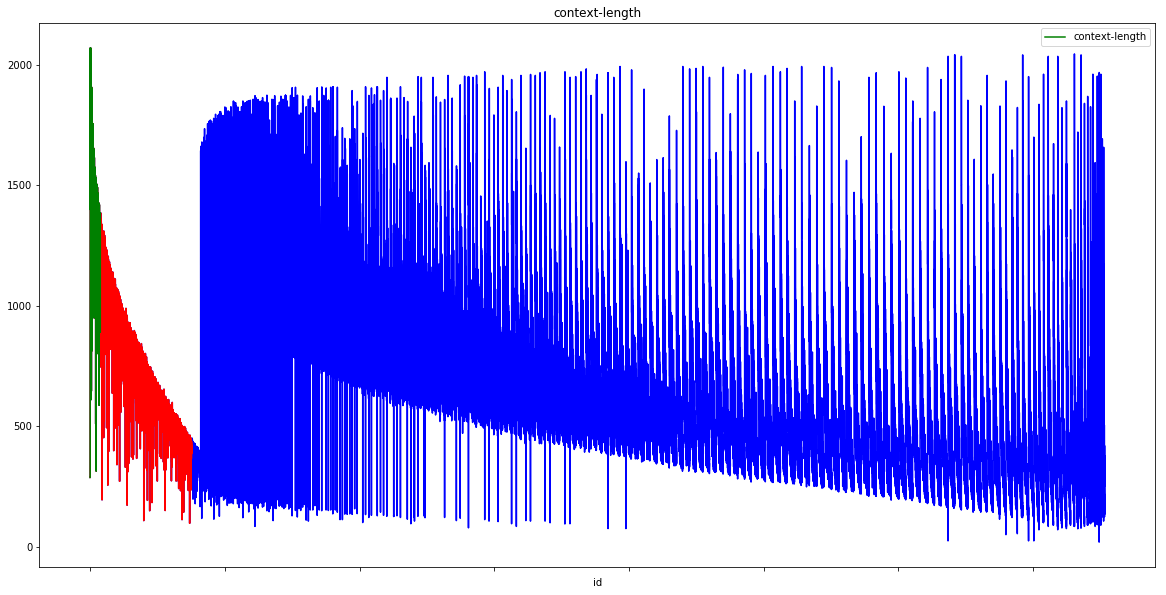

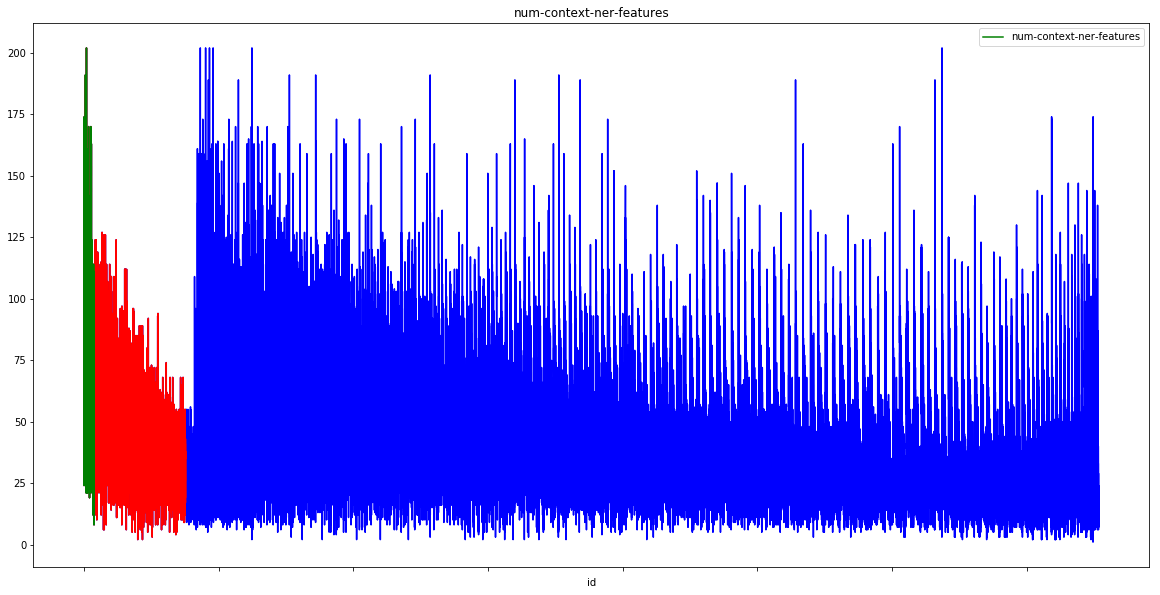

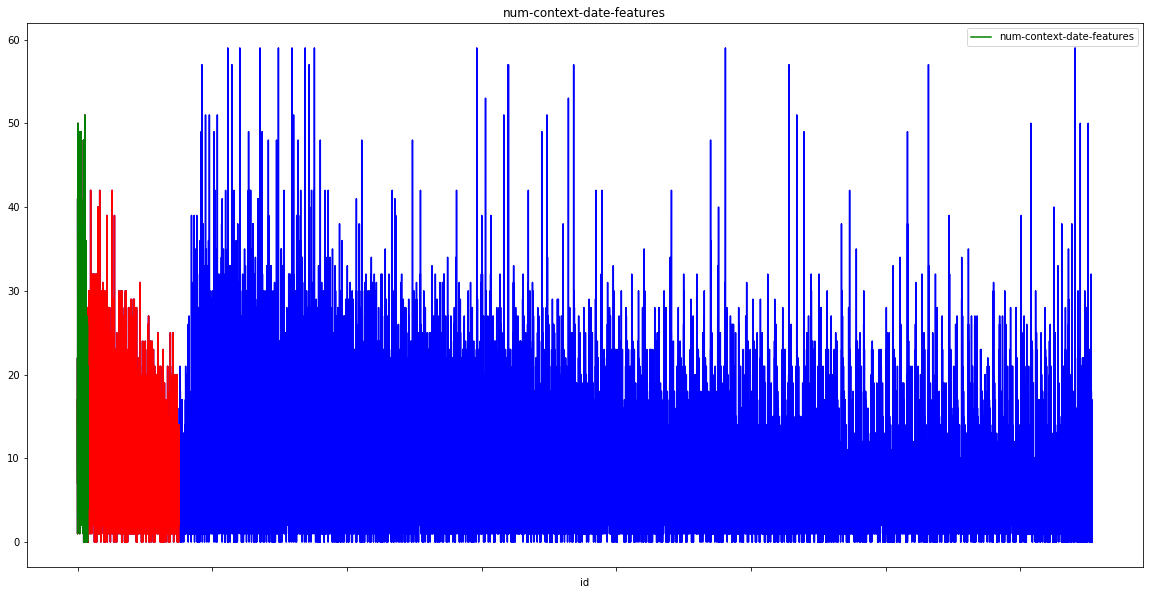

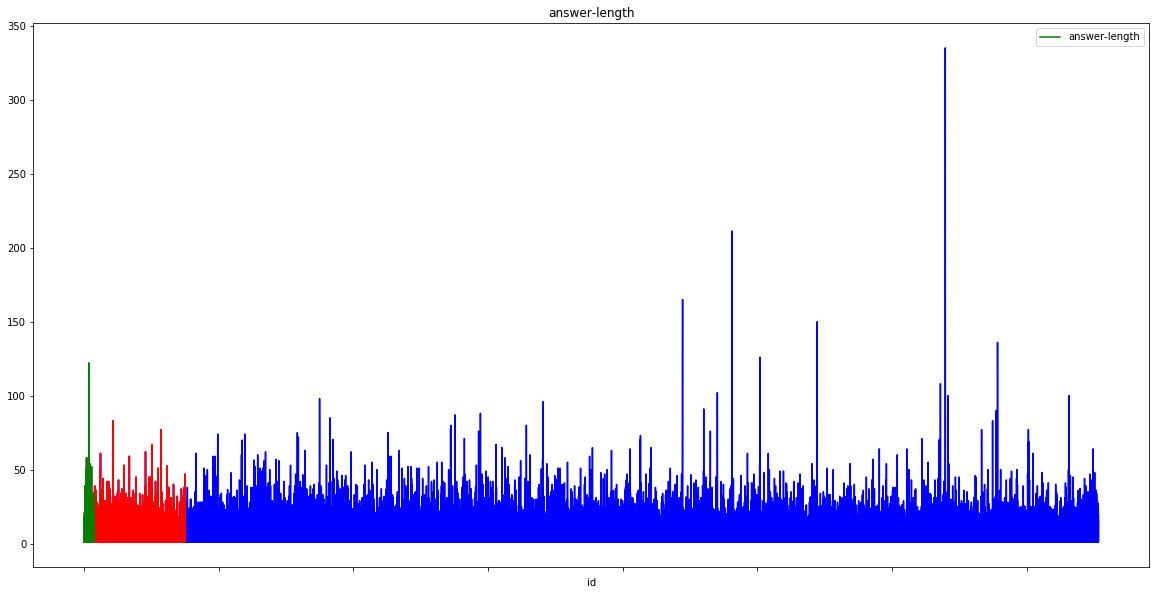

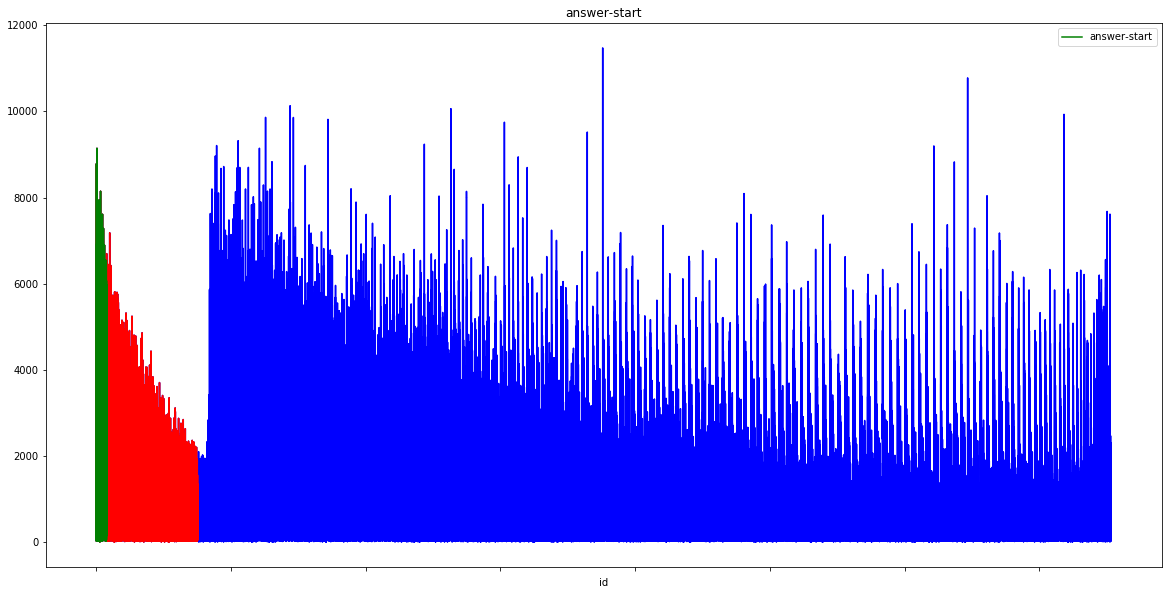

In [13]:
plot_features(logits_10_i2)

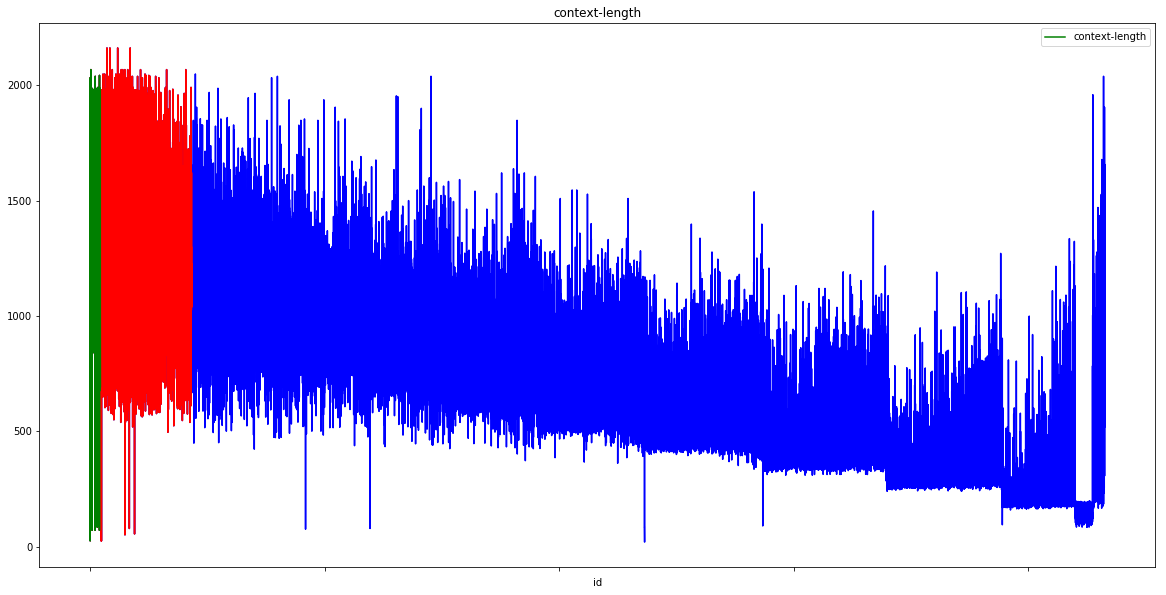

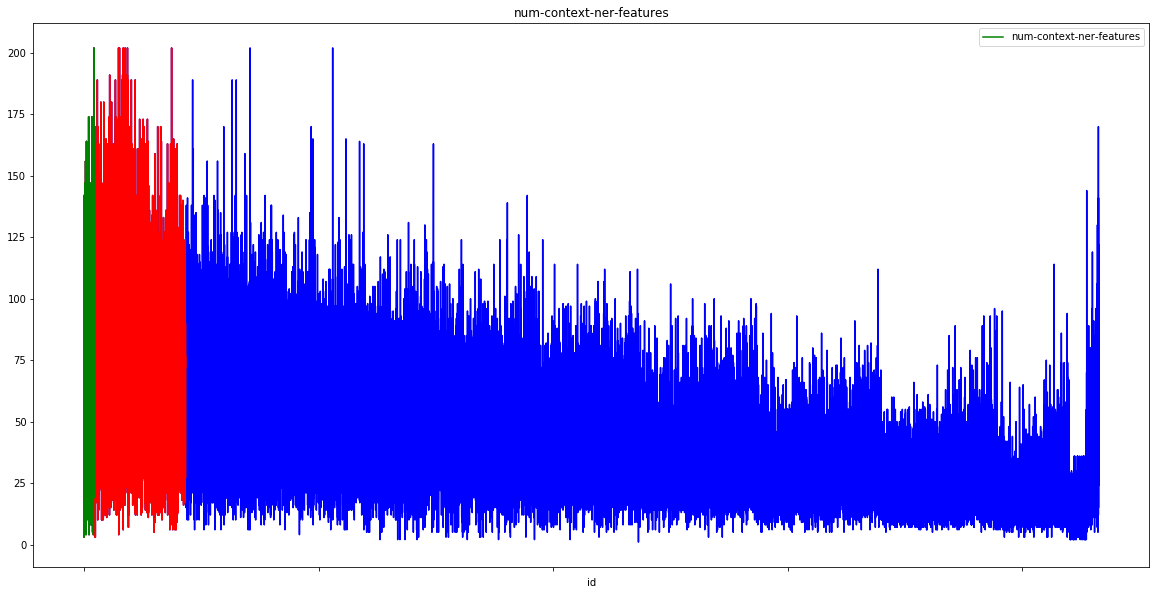

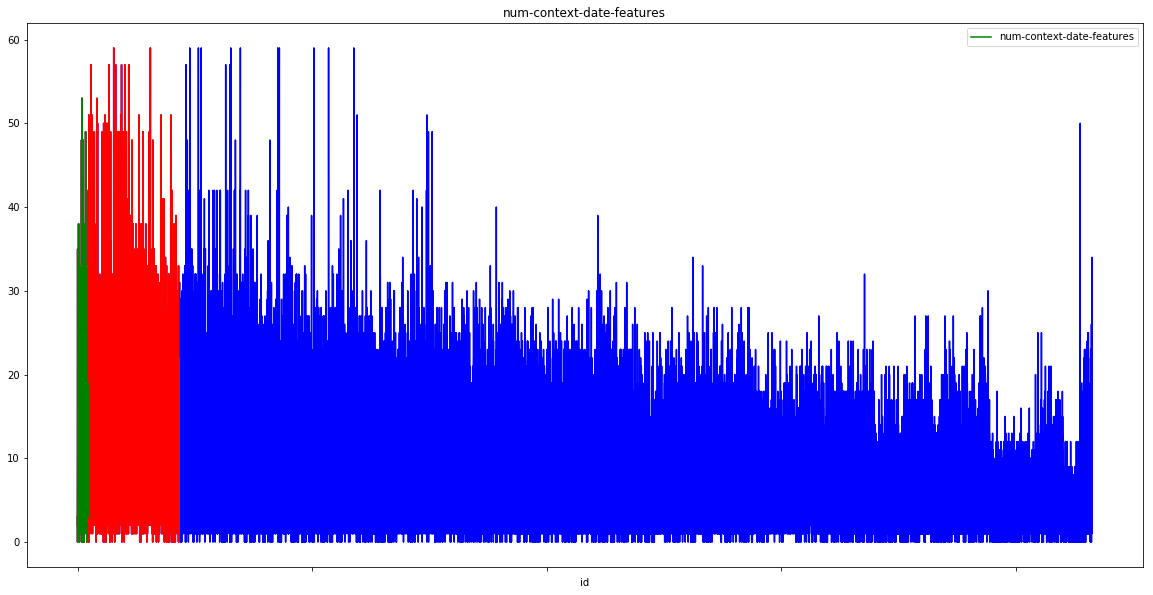

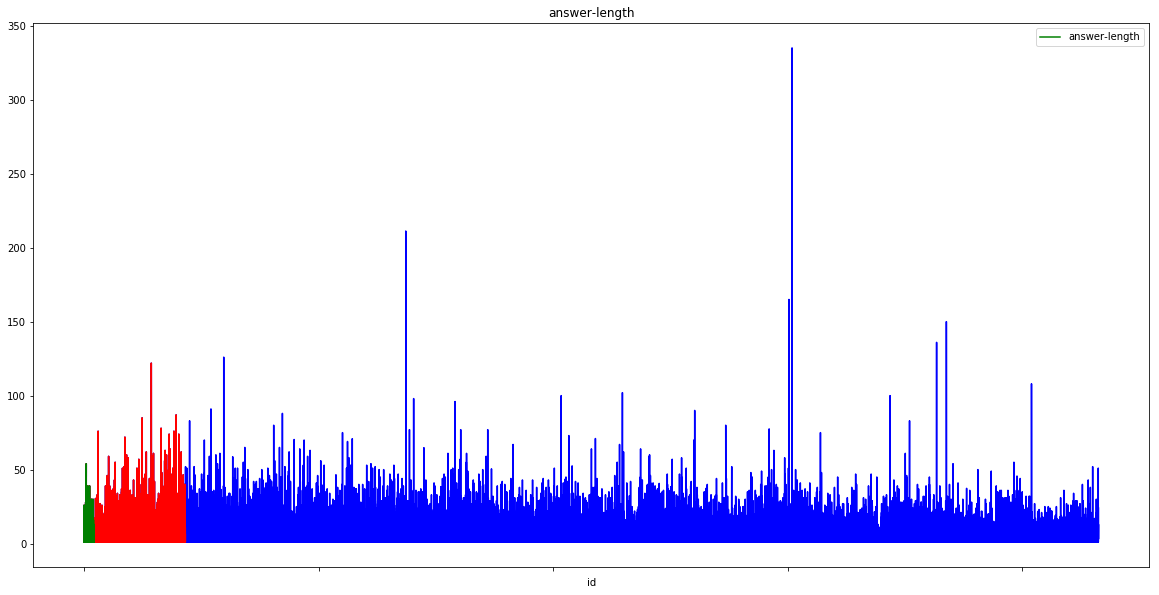

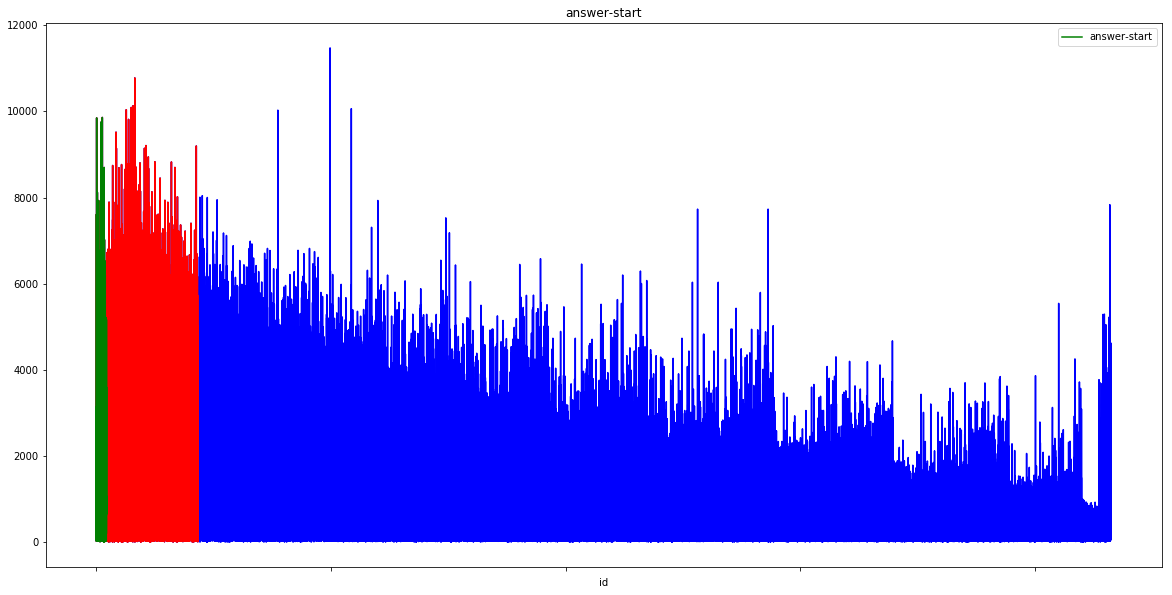

In [14]:
plot_features(logits_d1_t1_i2)